In [9]:
import gym
import tensorflow as tf
import numpy as np
import os
import time

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from multiprocessing import Process
from rl_utils import PolicyGradient, run_rollouts, render_NOerrors, args_jupyter, wrapper
import plot

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.5, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Imports specifically so we can render outputs in Jupyter.
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display
    
def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    session = tf.Session(config=config)
    return session

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    #plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=25)
    display(display_animation(anim, default_mode='loop'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# logdirs = ['data/first_try_CartPole-v0_29-05-2018_00-08-50', 'data/first_try_CartPole-v0_29-05-2018_00-09-15']
# logdirs = ['data/first_try_CartPole-v0_29-05-2018_00-08-50']
logdirs = []

In [13]:
n_experiments = 4
initial_seed = 0
argumentitos = {
    'exp_name': 'vanilla',
    'env_name': "CartPole-v0",
    'nn_baseline': False,
    'n_iter': 100,
    'batch_size': 1000,
    'normalize_advantages': True
}

# Create the logdir
if not(os.path.exists('data')):
    os.makedirs('data')
logdir = argumentitos.get('exp_name', 'vpg') + '_' + argumentitos.get('env_name') + '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
logdir = os.path.join('data', logdir)
if not(os.path.exists(logdir)):
    os.makedirs(logdir)
print(logdir)
logdirs.append(logdir)

processes = []
for e in range(n_experiments):
    seed = initial_seed + 10*e
    parsed_args = args_jupyter(argumentitos, seed)
    def train_func():
        wrapper(parsed_args, logdir)
    
    p = Process(target=train_func, args=tuple())
    p.start()
    processes.append(p)

for i in processes:
    p.join()
print('finished trainning :3')

data/vanilla_CartPole-v0_09-06-2018_21-15-04
Logging data to data/vanilla_CartPole-v0_09-06-2018_21-15-04/0/log.txt
Logging data to data/vanilla_CartPole-v0_09-06-2018_21-15-04/10/log.txt
Logging data to data/vanilla_CartPole-v0_09-06-2018_21-15-04/20/log.txt
Logging data to data/vanilla_CartPole-v0_09-06-2018_21-15-04/30/log.txt
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
********** Iteration 0 ************
********** Iteration 0 ************
********** Iteration 0 ************
********** Iteration 0 ************
********** Iteration 20 ************
********** Iteration 20 ************
********** Iteration 20 ************
********** Iterat

In [14]:
n_experiments = 4
initial_seed = 0
argumentitos = {
    'exp_name': 'baseline_experiment',
    'env_name': "CartPole-v0",
    'nn_baseline': True,
    'n_iter': 100,
    'batch_size': 1000,
    'normalize_advantages': True
}

# Create the logdir
if not(os.path.exists('data')):
    os.makedirs('data')
logdir = argumentitos.get('exp_name', 'vpg') + '_' + argumentitos.get('env_name') + '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
logdir = os.path.join('data', logdir)
if not(os.path.exists(logdir)):
    os.makedirs(logdir)
print(logdir)
logdirs.append(logdir)

processes = []
for e in range(n_experiments):
    seed = initial_seed + 10*e
    parsed_args = args_jupyter(argumentitos, seed)
    def train_func():
        wrapper(parsed_args, logdir)
    
    p = Process(target=train_func, args=tuple())
    p.start()
    processes.append(p)

for i in processes:
    p.join()
print('finished trainning :3')

data/baseline_experiment_CartPole-v0_09-06-2018_21-19-36
Logging data to data/baseline_experiment_CartPole-v0_09-06-2018_21-19-36/0/log.txt
Logging data to data/baseline_experiment_CartPole-v0_09-06-2018_21-19-36/10/log.txt
Logging data to data/baseline_experiment_CartPole-v0_09-06-2018_21-19-36/20/log.txt
Logging data to data/baseline_experiment_CartPole-v0_09-06-2018_21-19-36/30/log.txt
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
********** Iteration 0 ************
********** Iteration 0 ************
********** Iteration 0 ************
********** Iteration 0 ************
********** Iteration 20 ************
********** Iteration 20 *******

Gonna plot the shit out of this experiments: ['data/vanilla_CartPole-v0_09-06-2018_21-15-04', 'data/baseline_experiment_CartPole-v0_09-06-2018_21-19-36']


/home/raizo/Documents/cs294/.env/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


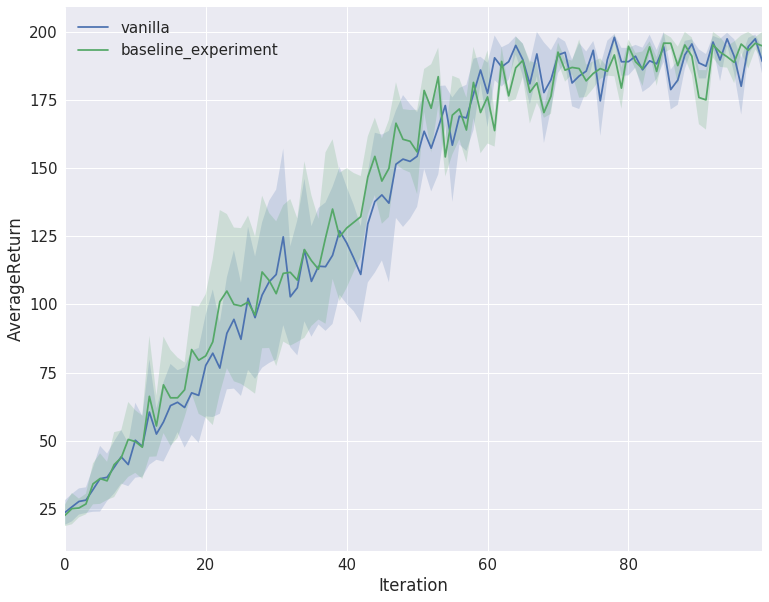

finished plotting :3


In [15]:
print('Gonna plot the shit out of this experiments:', logdirs)
data = []
for logdir in logdirs:
    data += plot.get_datasets(logdir)

values = ['AverageReturn']
if isinstance(values, list):
    values = values
else:
    values = [values]
    
for value in values:
    plot.plot_data(data, os.path.join('data', 'cartpole_baseline_comparison' + value + '.png'), value=value)
    
print('finished plotting :3')

In [43]:
exp_name = 'test'
env_name = 'CartPole-v0'
seed = 1

if not(os.path.exists('data')):
    os.makedirs('data')
logdir = exp_name + '_' + env_name + '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
logdir = os.path.join('data', logdir)
if not(os.path.exists(logdir)):
    os.makedirs(logdir)

max_path_length = None

tf.reset_default_graph()
# just a single experiment
PG = PolicyGradient('simple_test', env_name, n_iter=100, nn_baseline=True, seed=seed, logdir=os.path.join(logdir, '%d'%seed))

Logging data to data/test_CartPole-v0_28-05-2018_02-11-45/1/log.txt
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [44]:
# tf.global_variables_initializer()
frames = PG.train(print_console=False)


********** Iteration 0 ************
********** Iteration 20 ************
********** Iteration 40 ************
********** Iteration 60 ************
********** Iteration 80 ************
********** Iteration 99 ************
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.



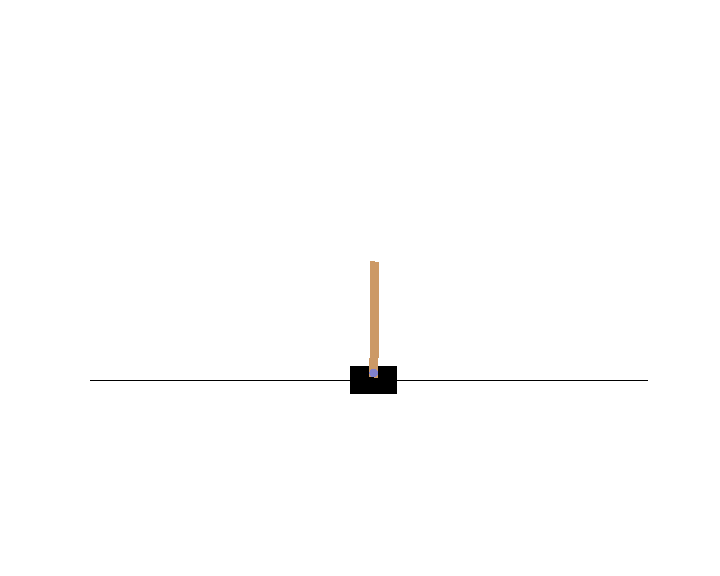
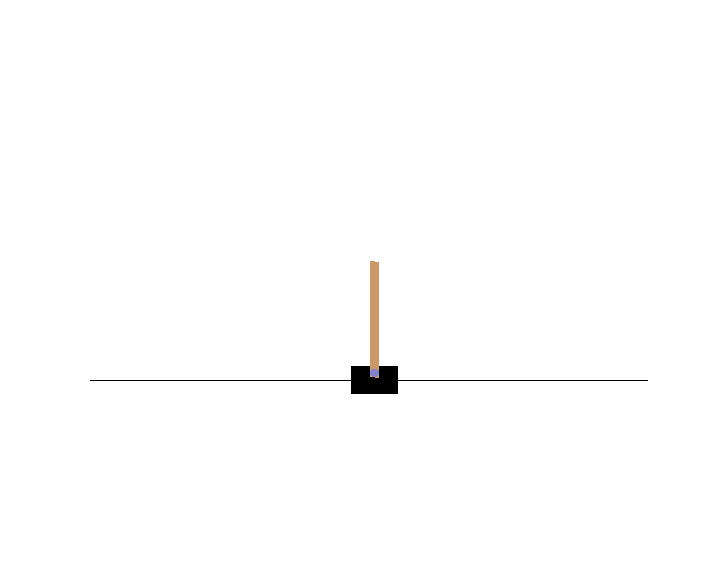
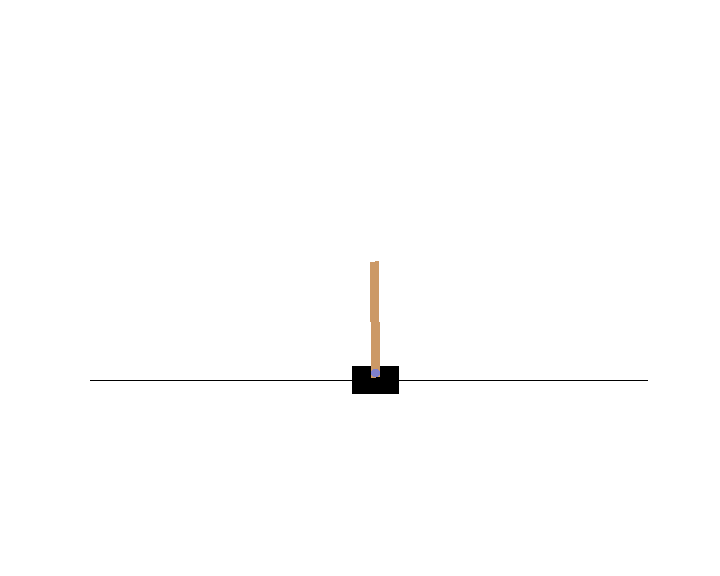
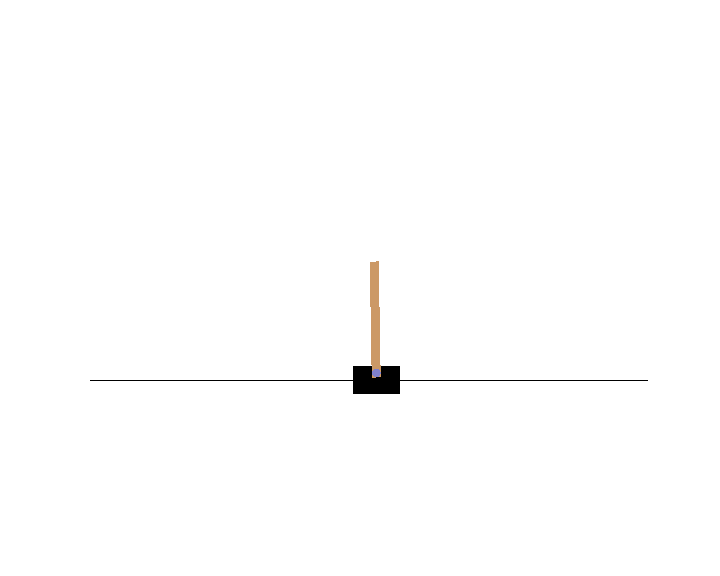
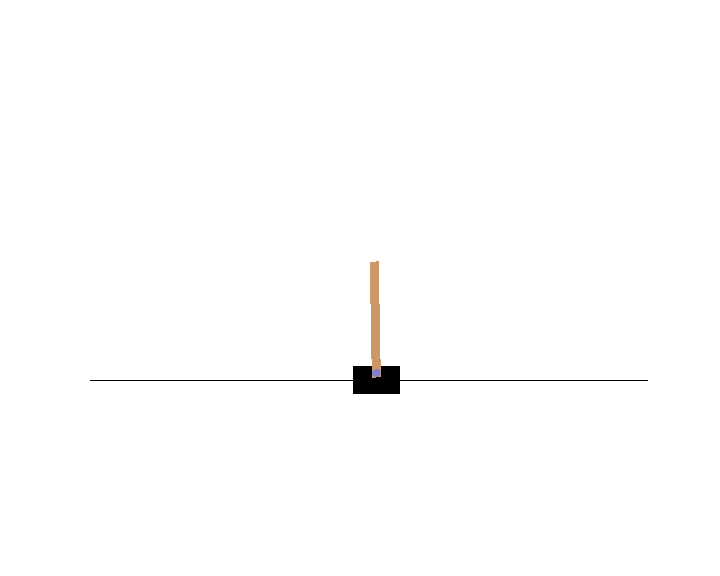
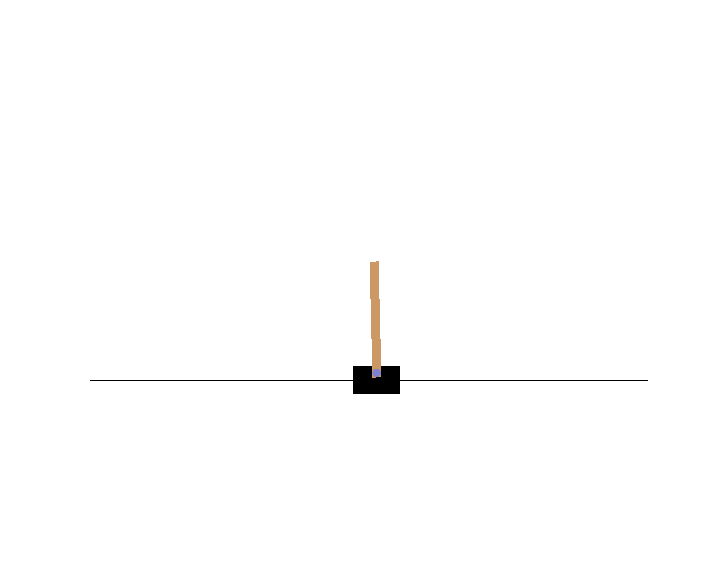
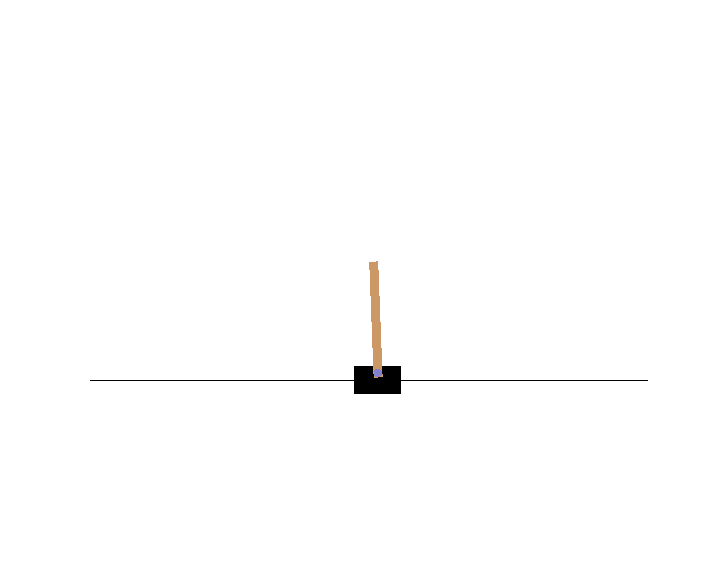
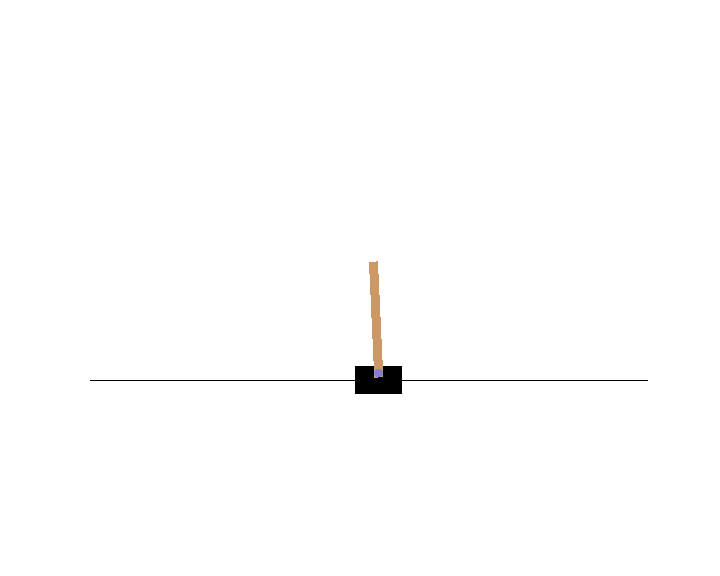
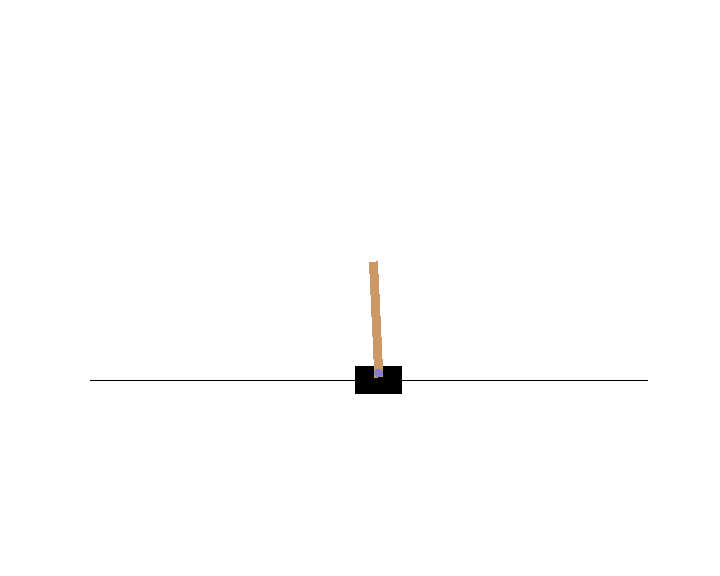
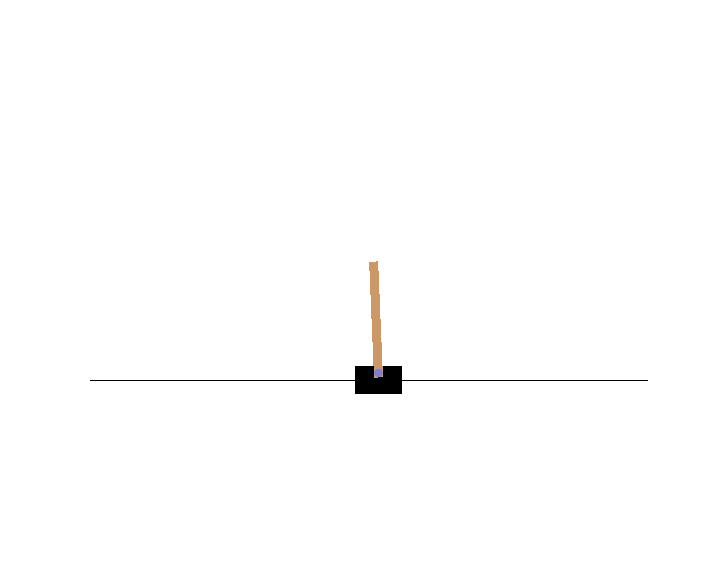
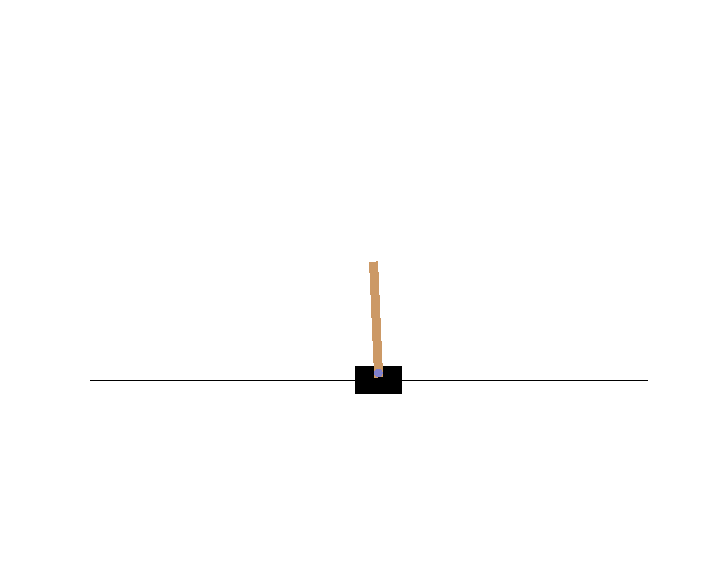
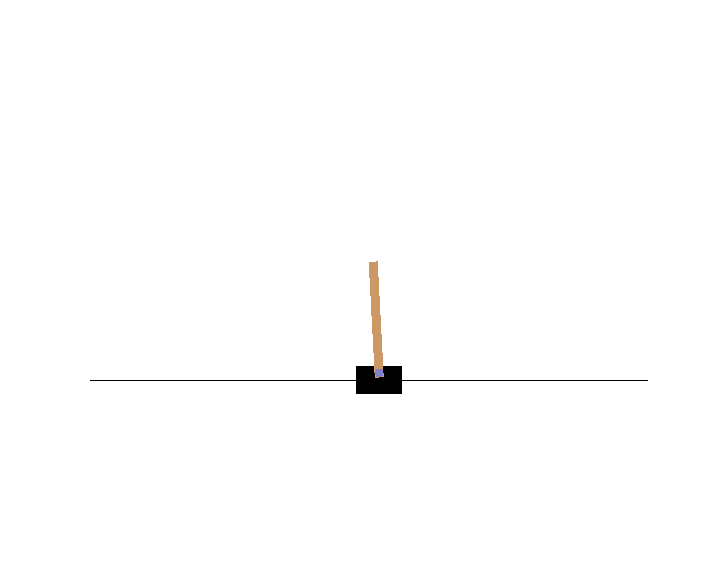
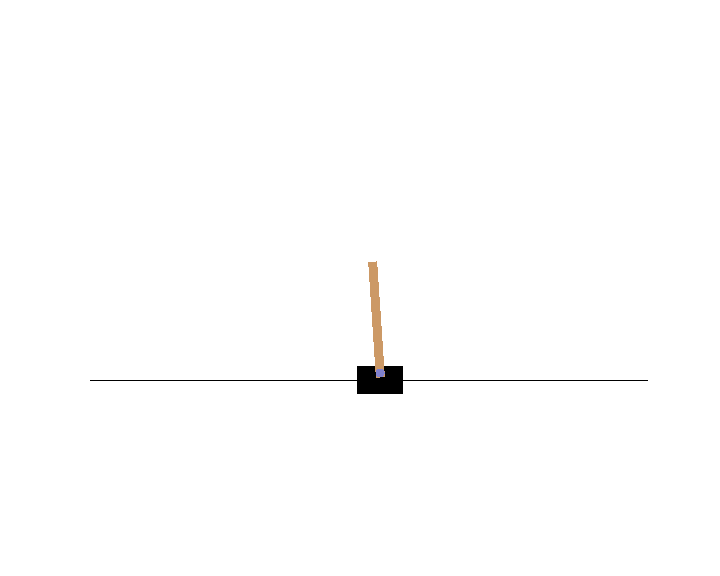
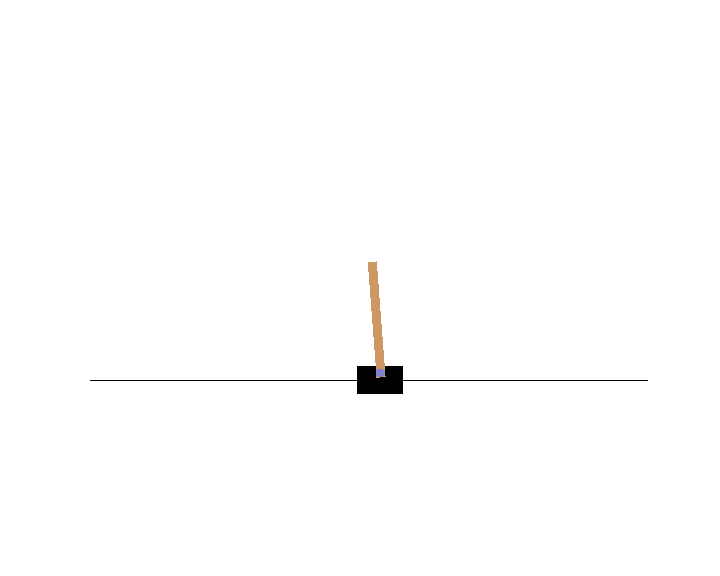
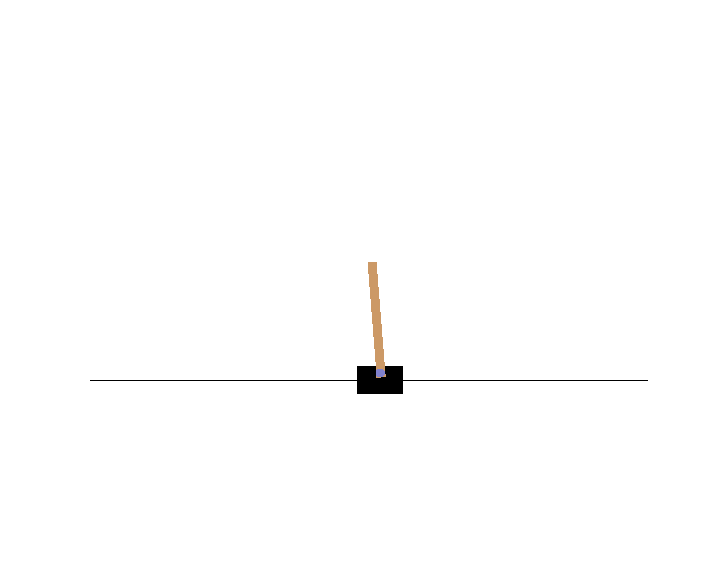
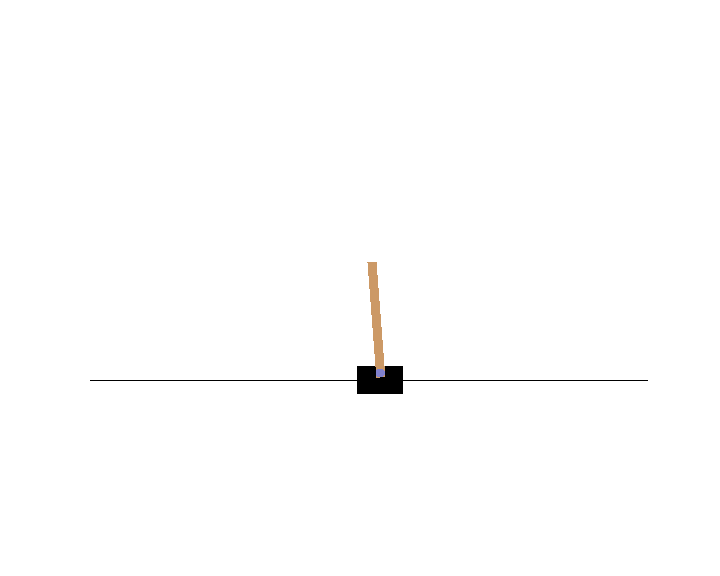
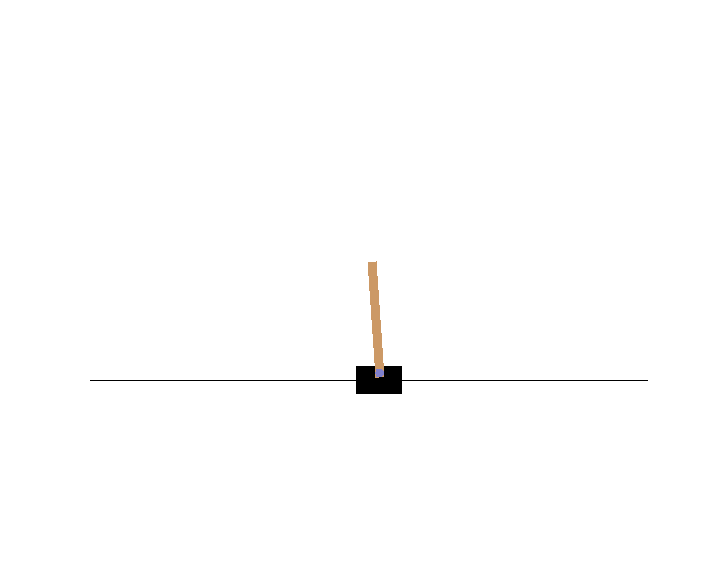
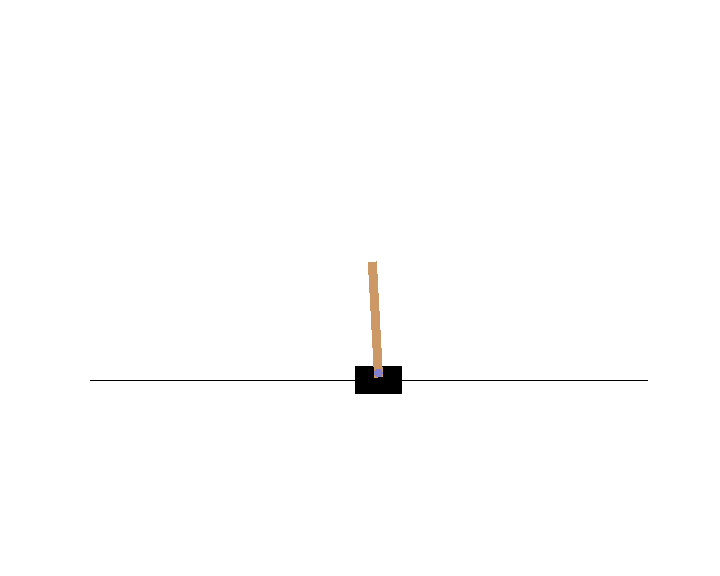
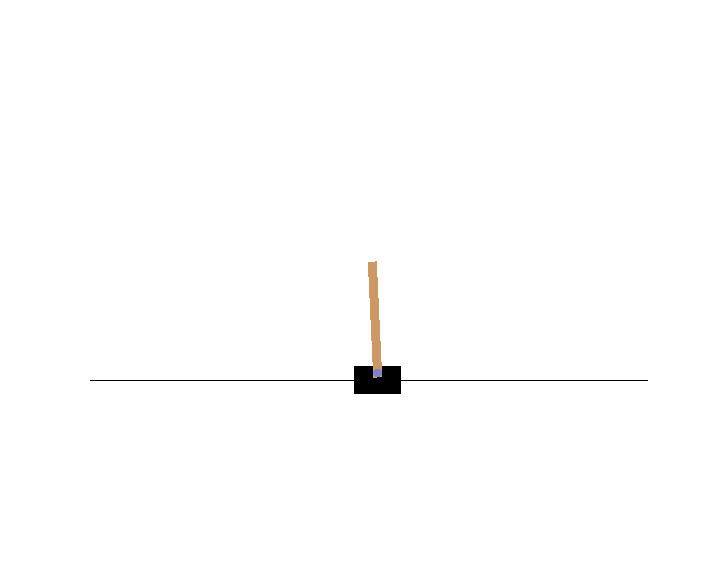
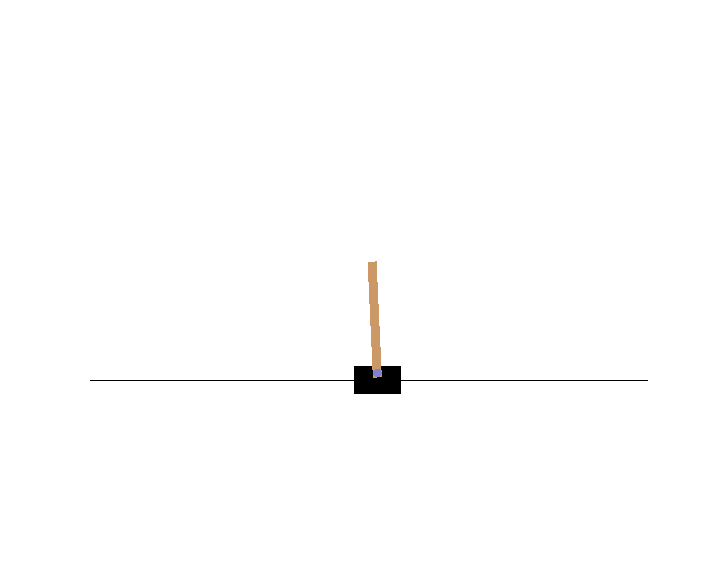
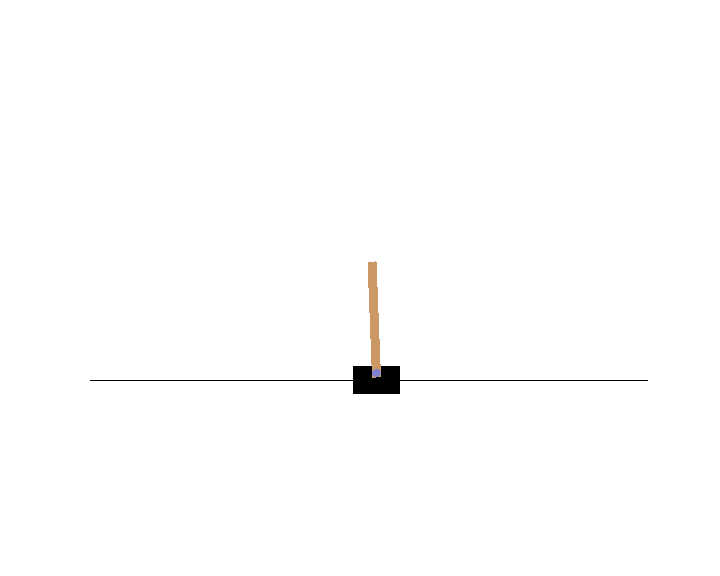
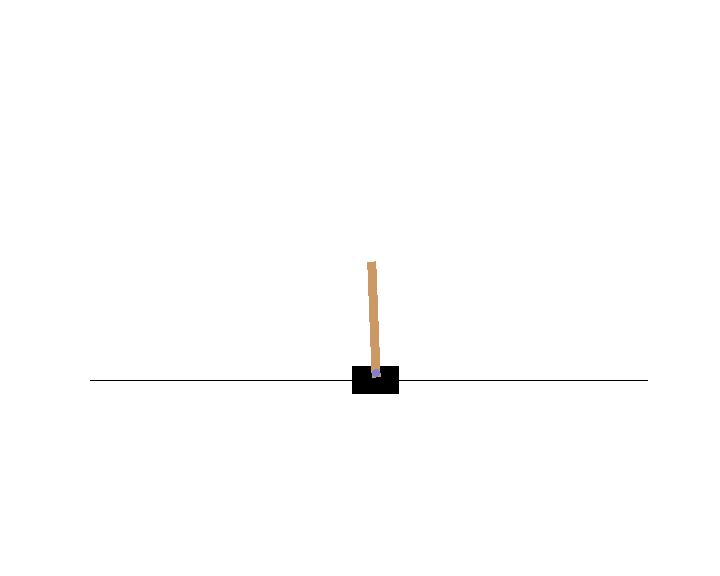
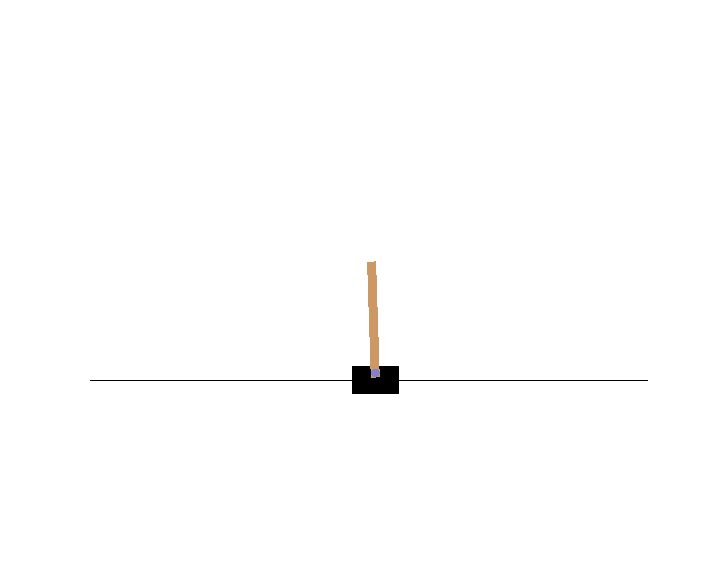
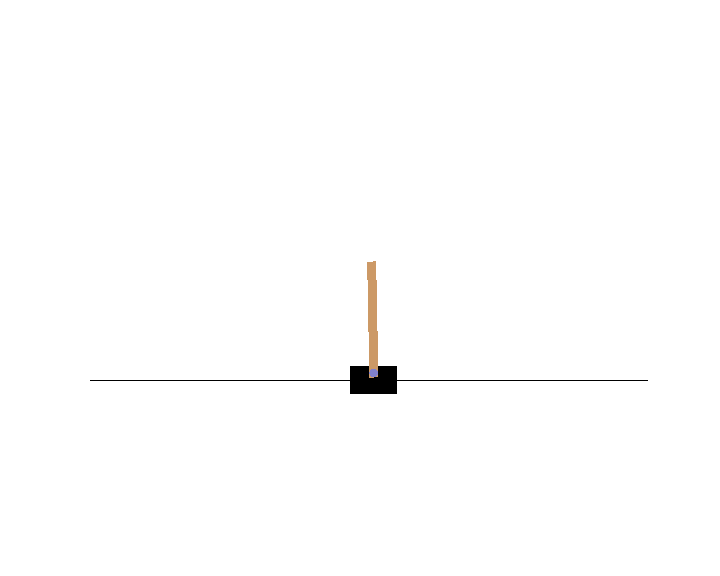
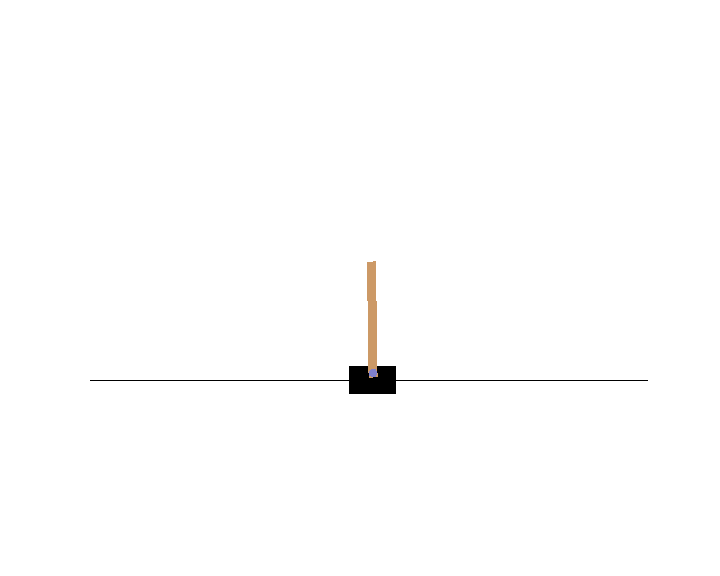
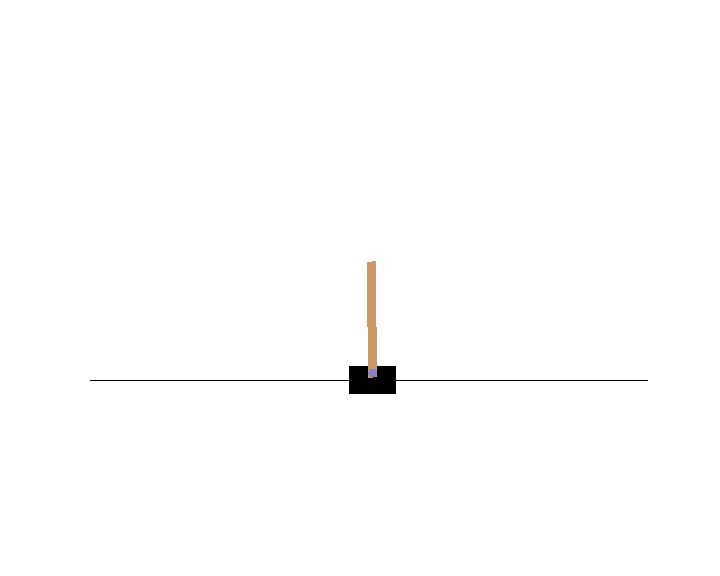
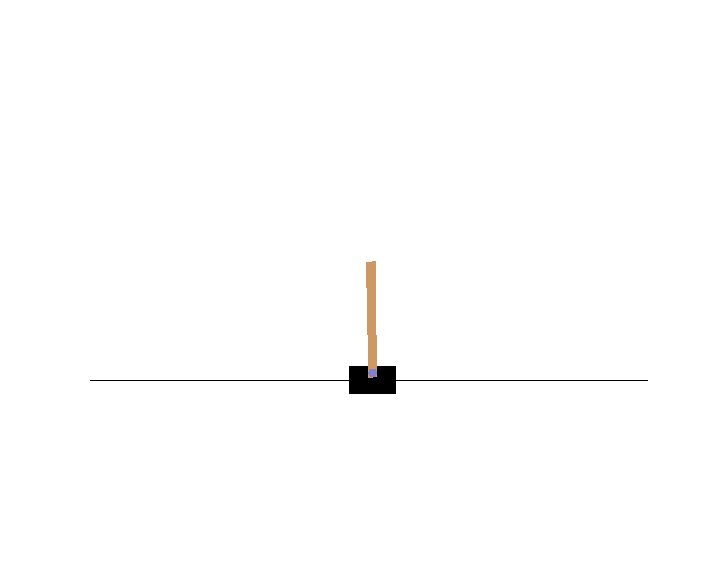
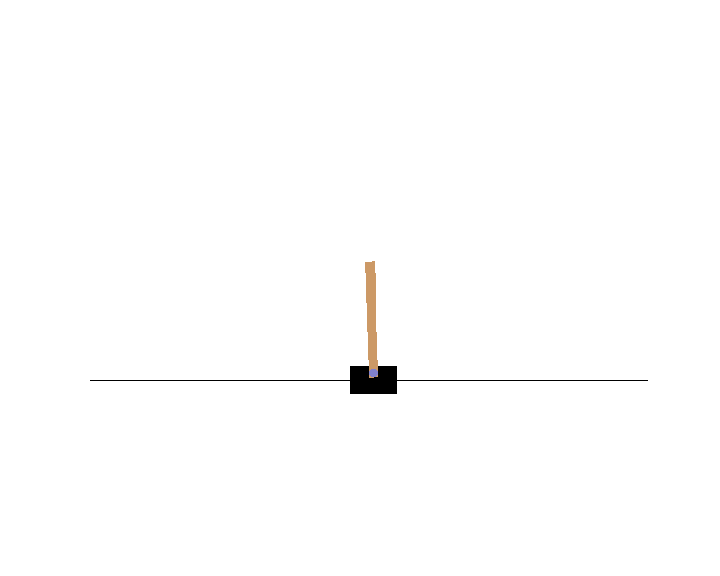
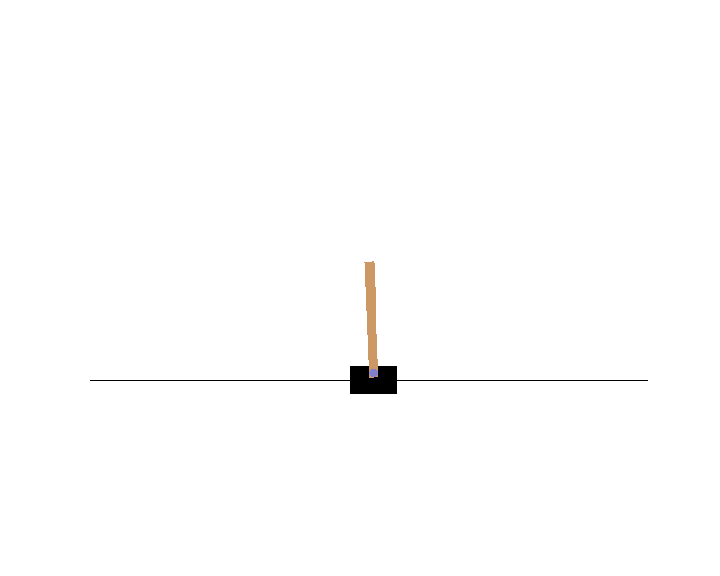
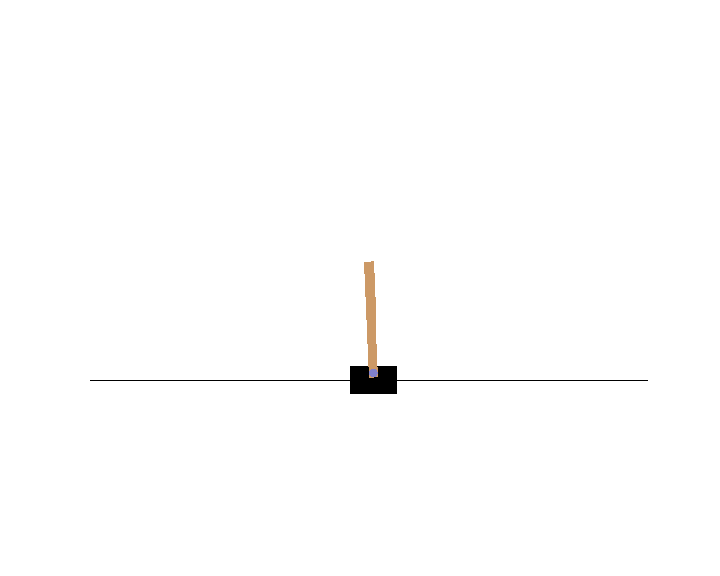
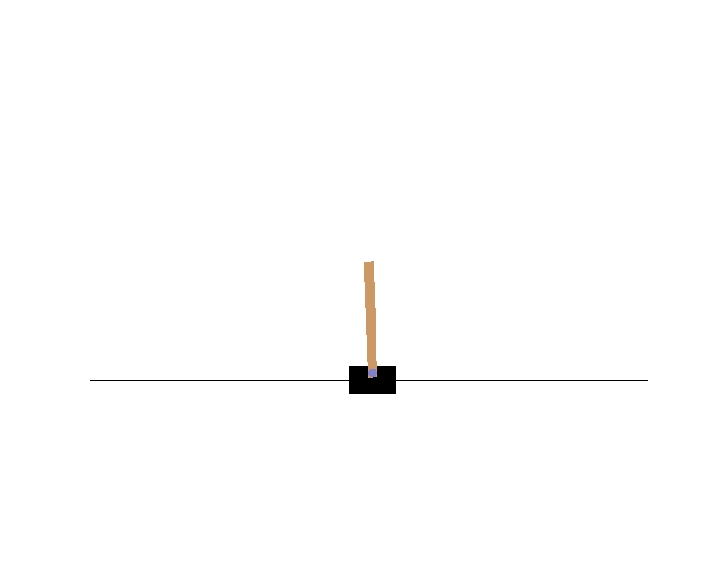
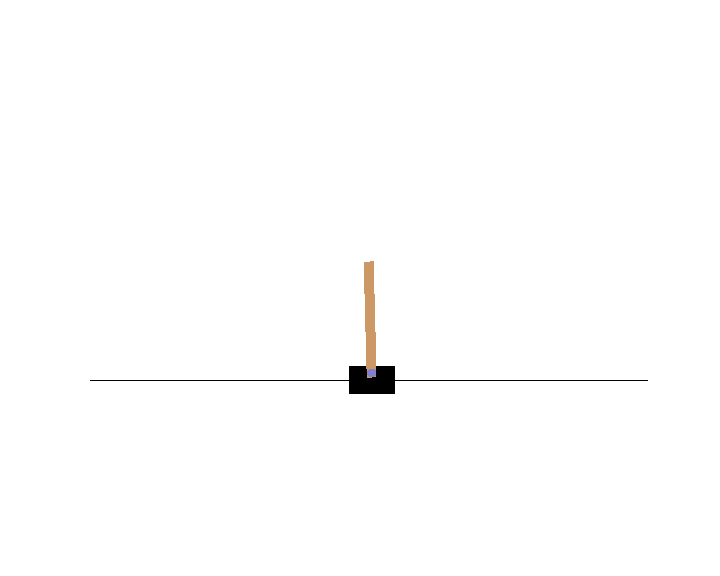
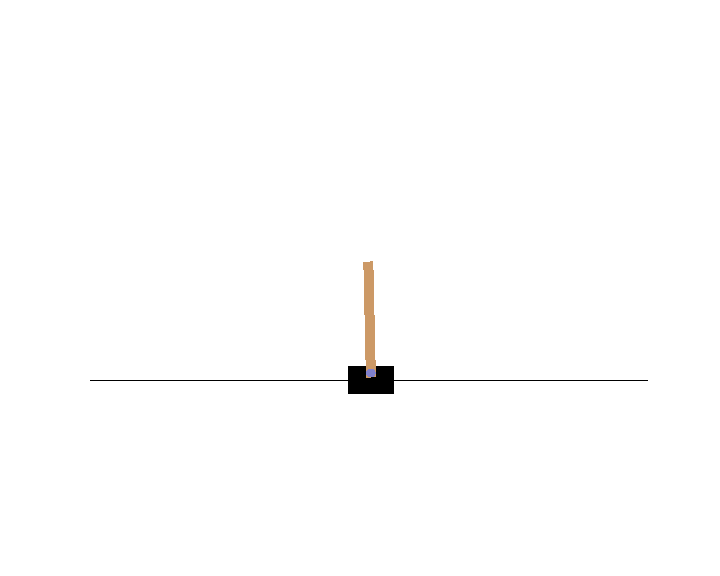
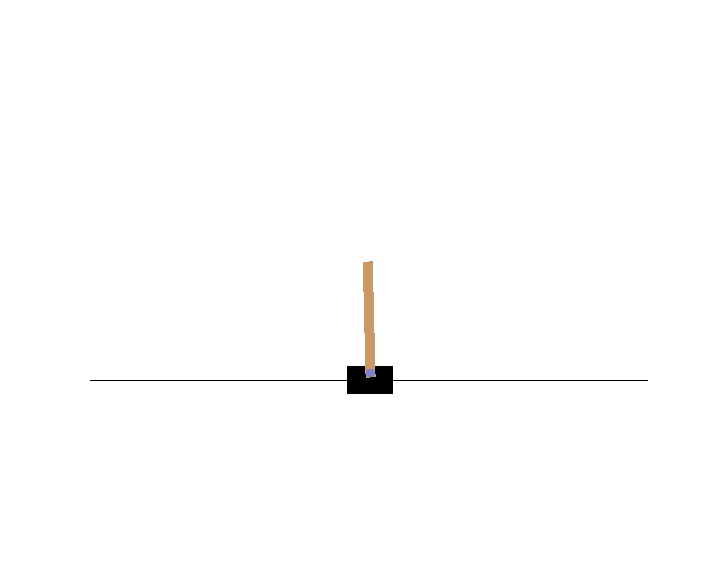
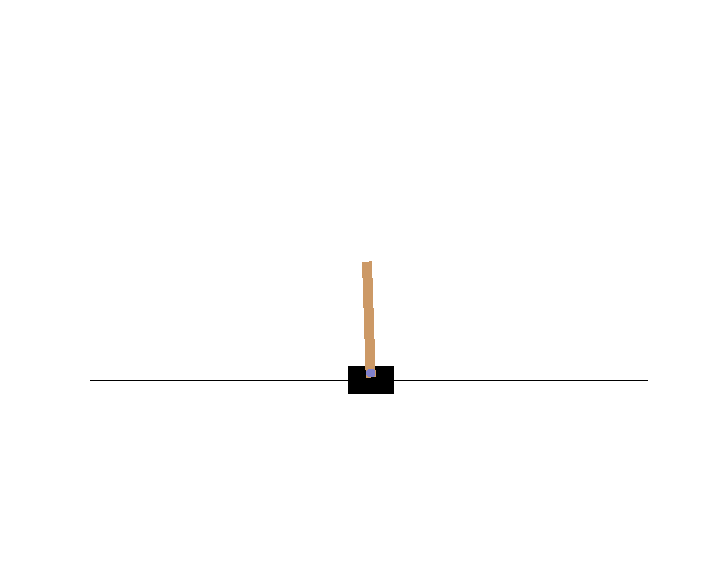
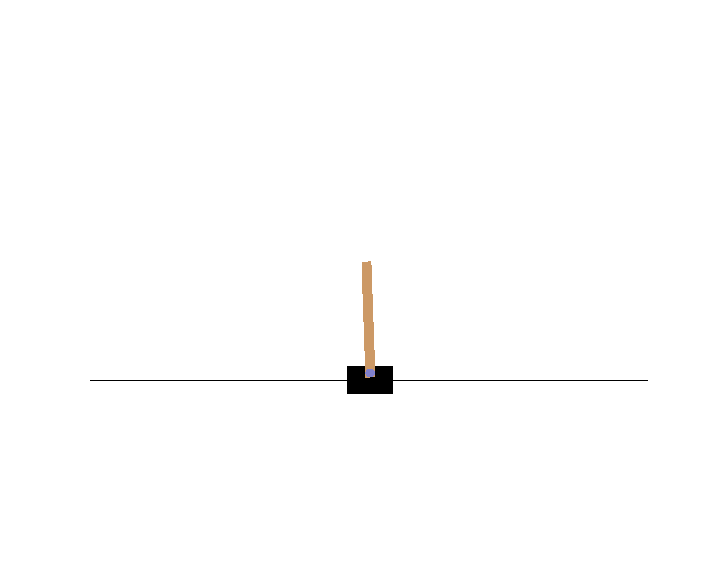
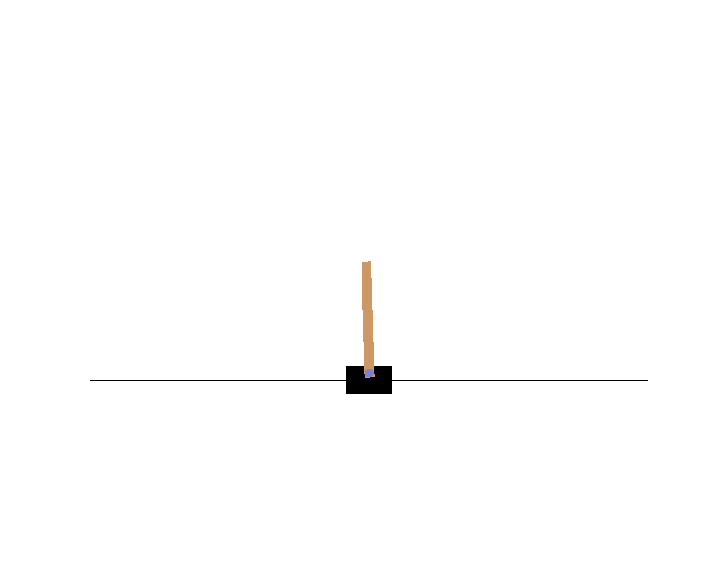
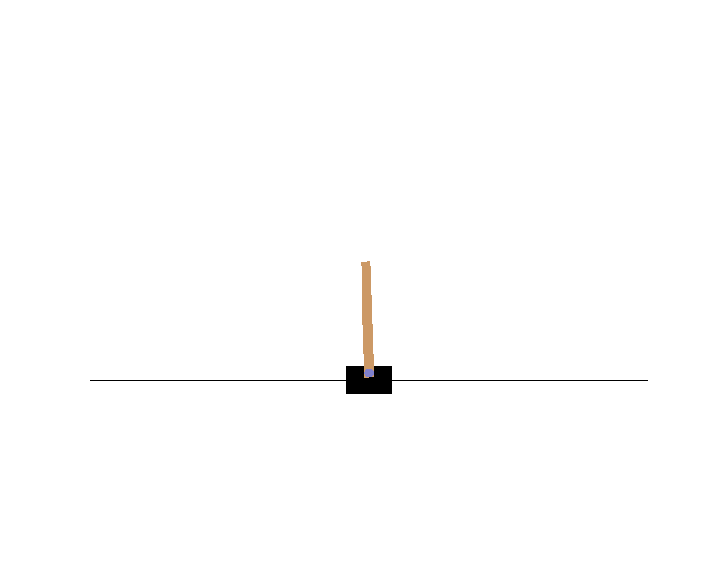
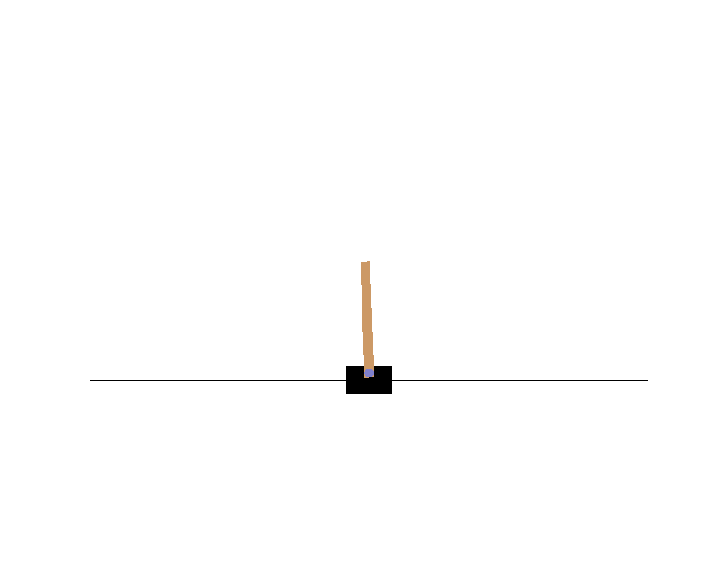
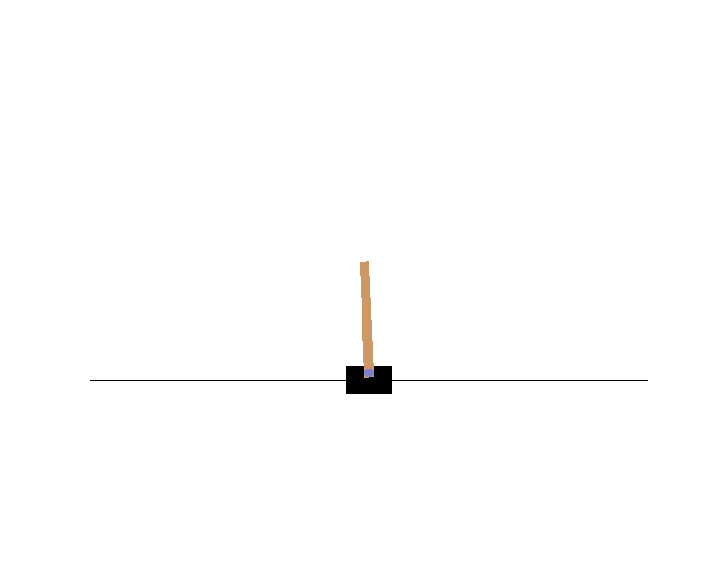
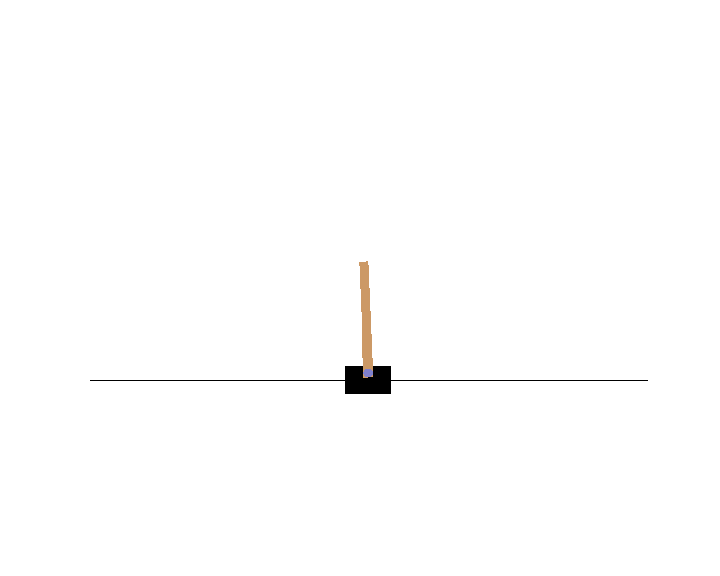
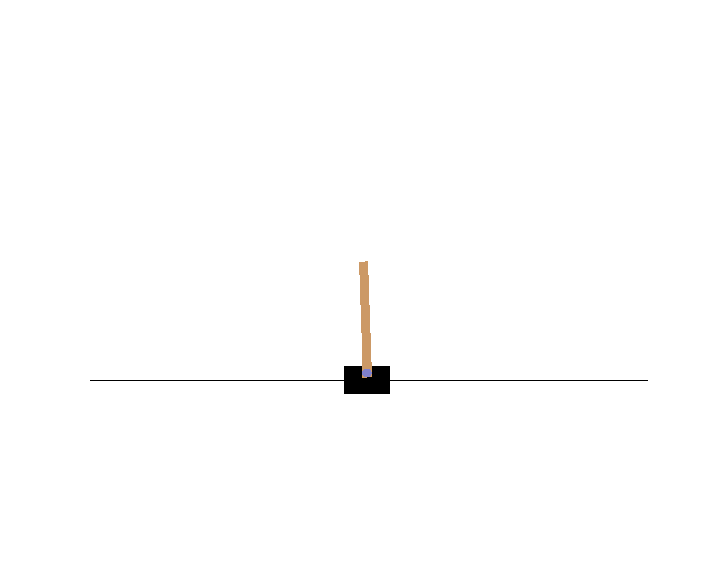
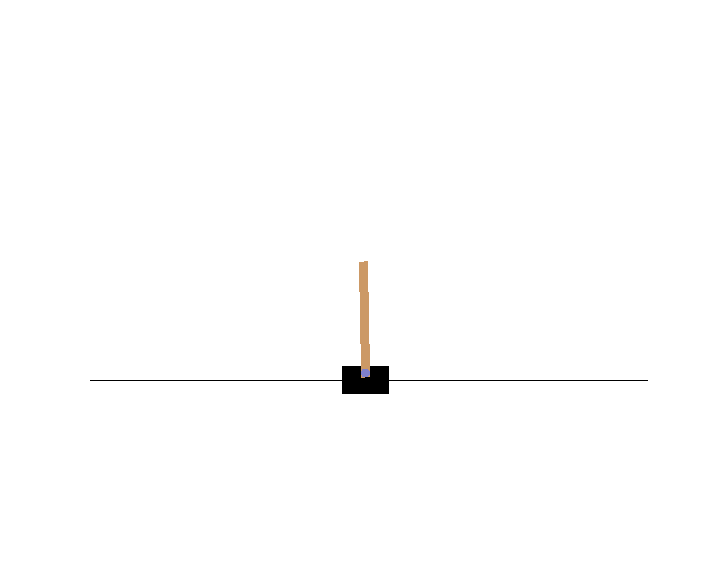
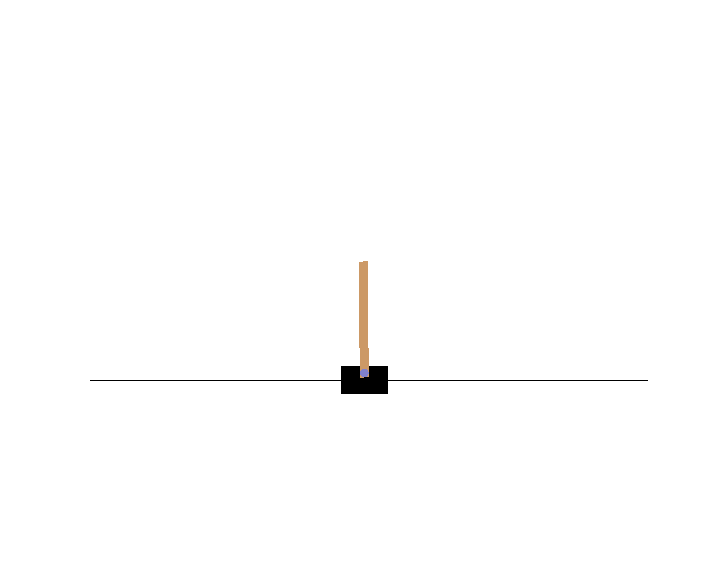
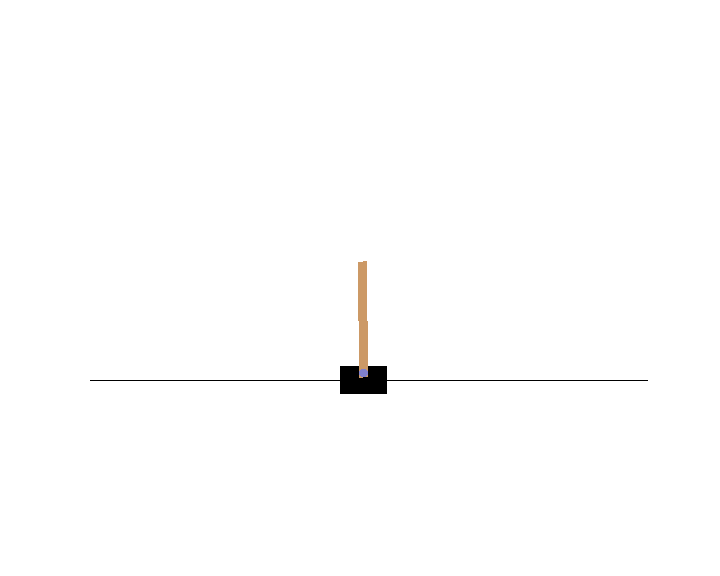
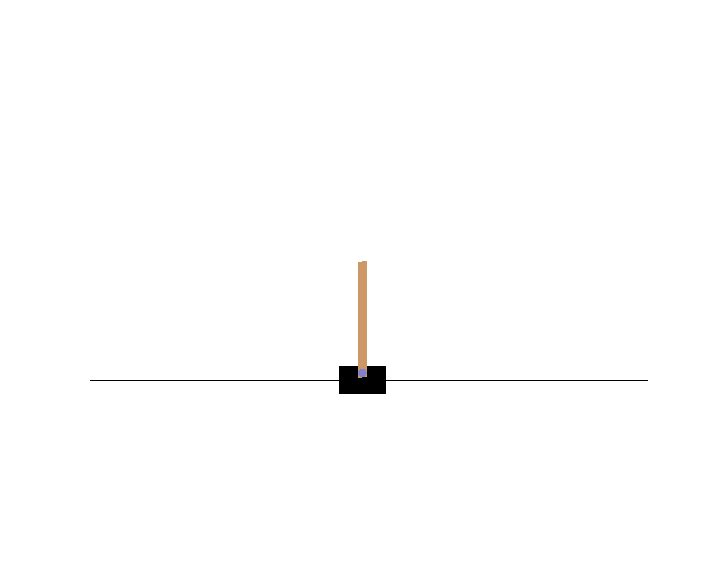
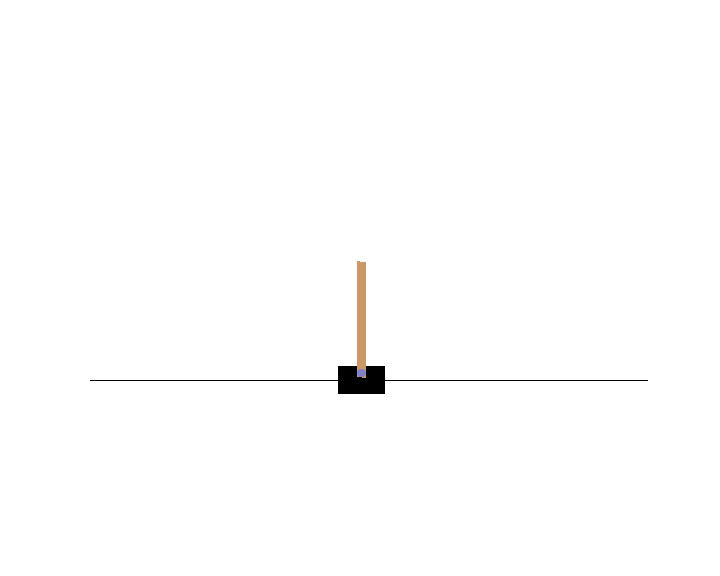
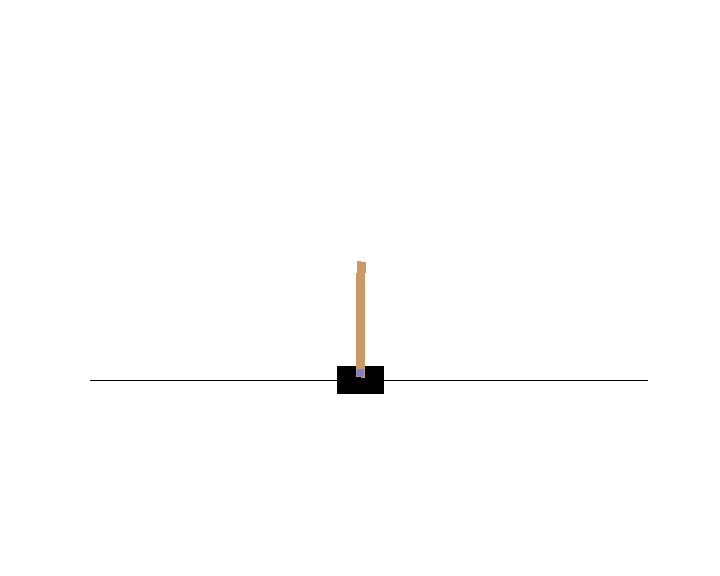
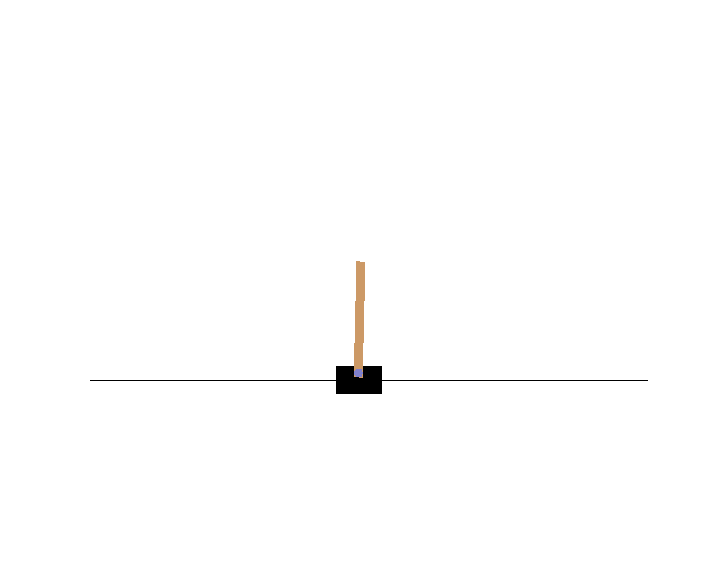
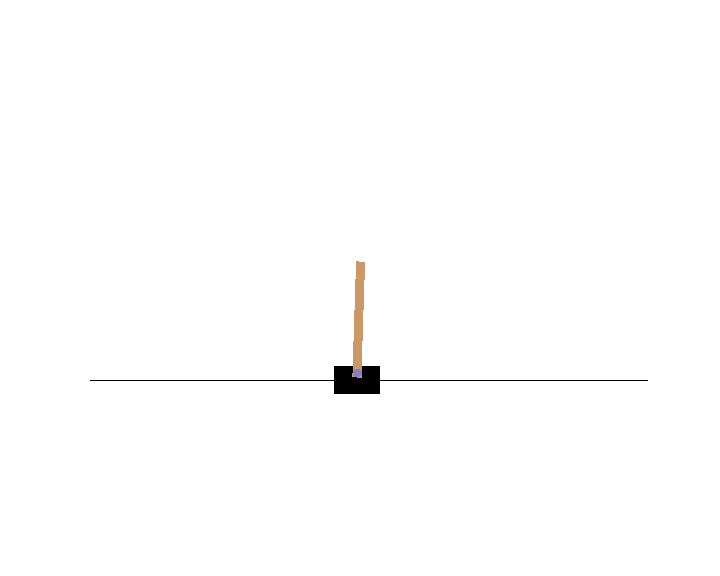
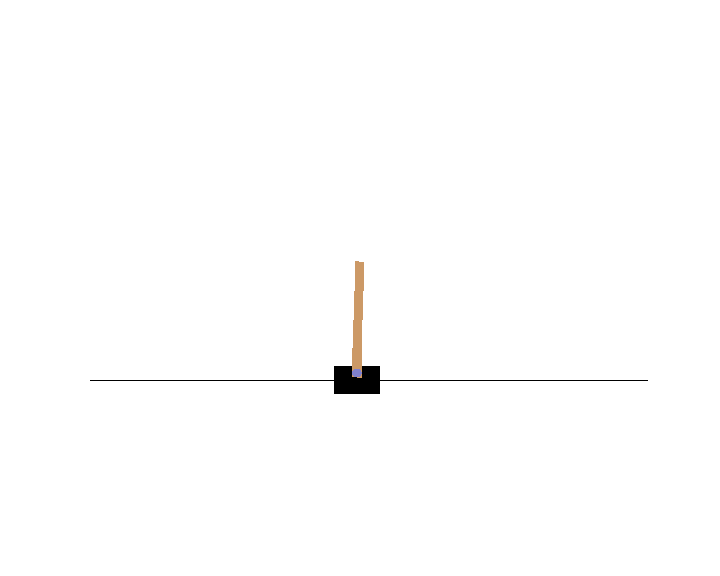
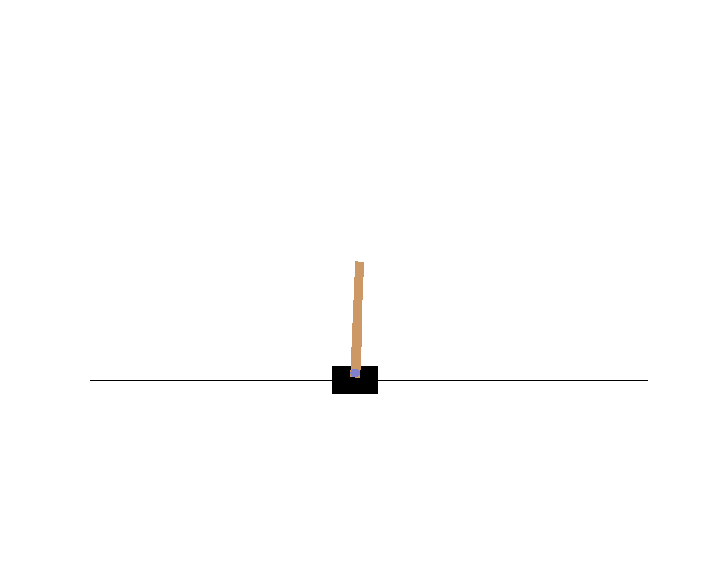
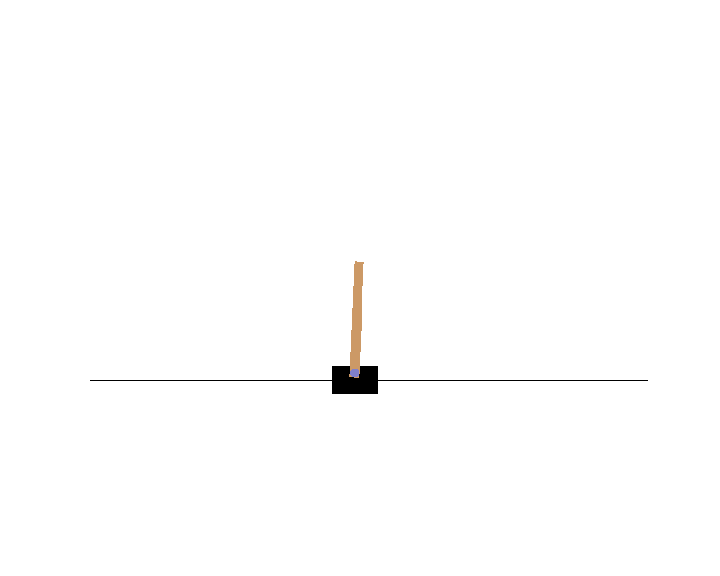
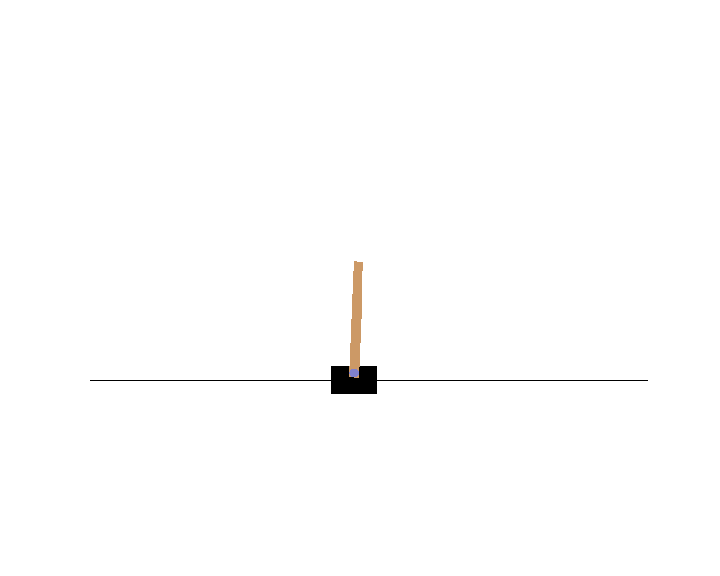
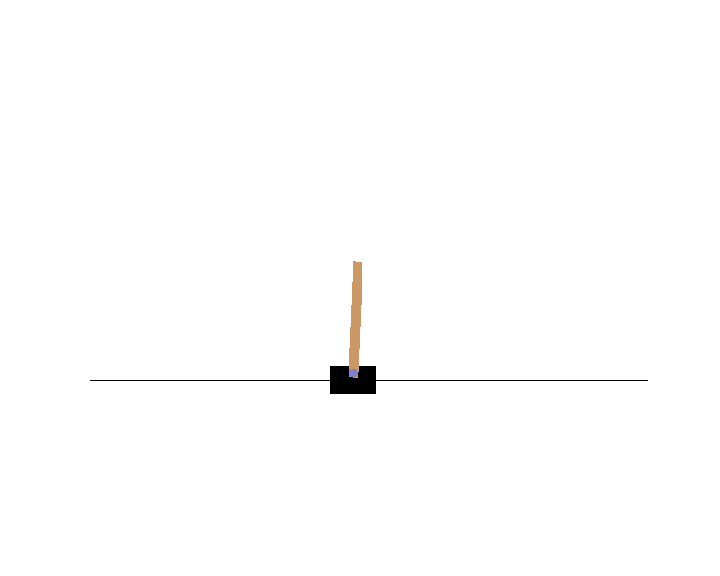
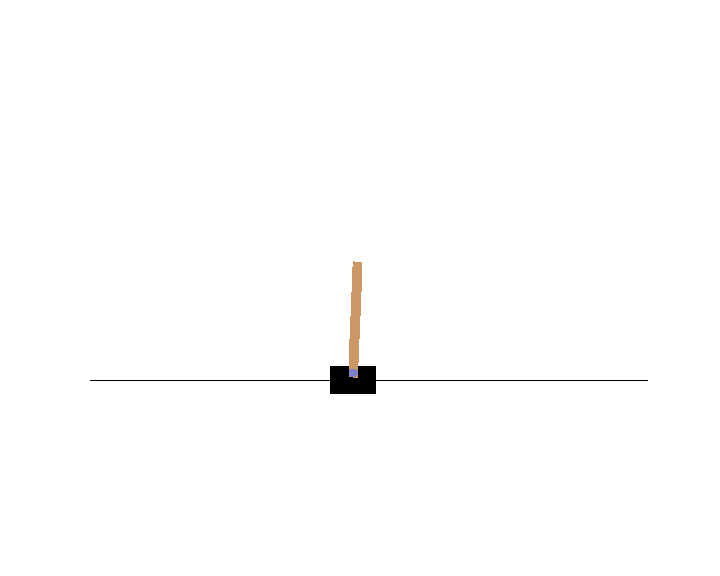
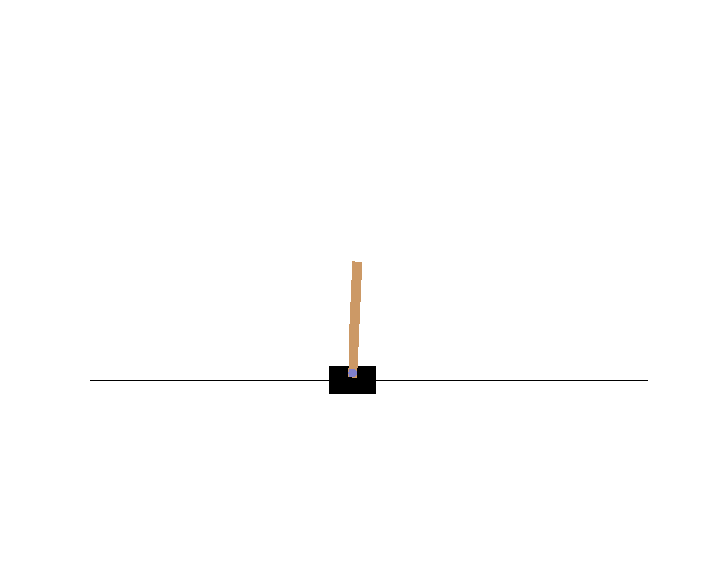
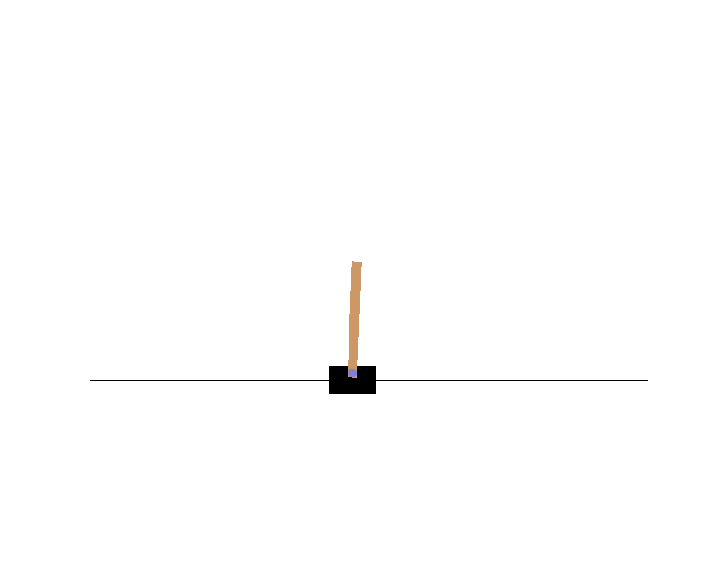
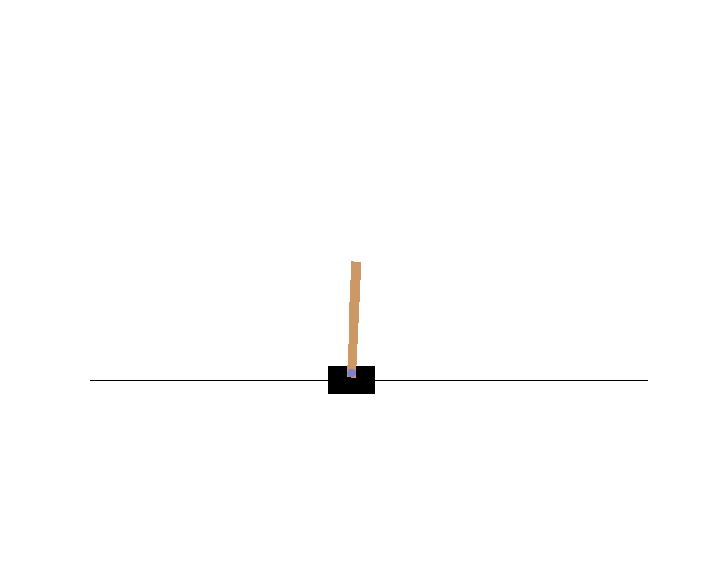
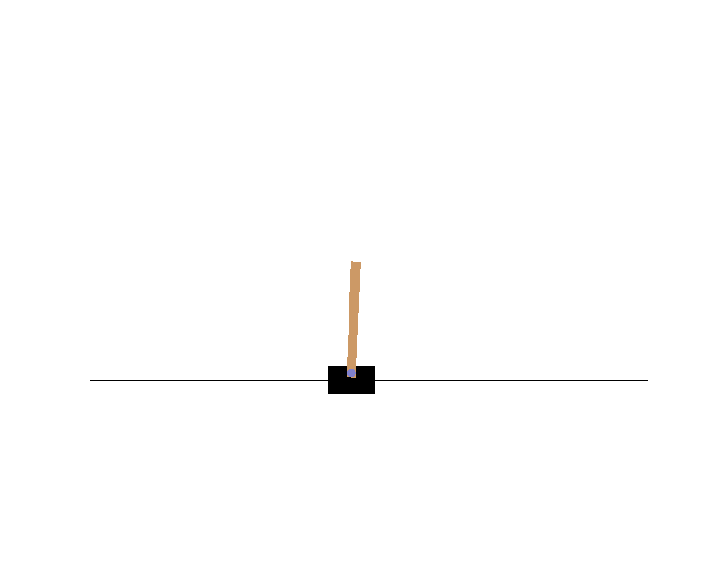
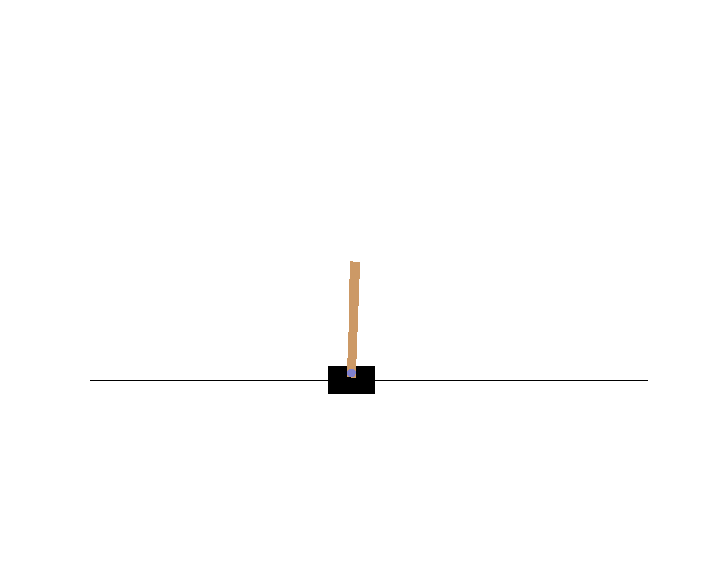
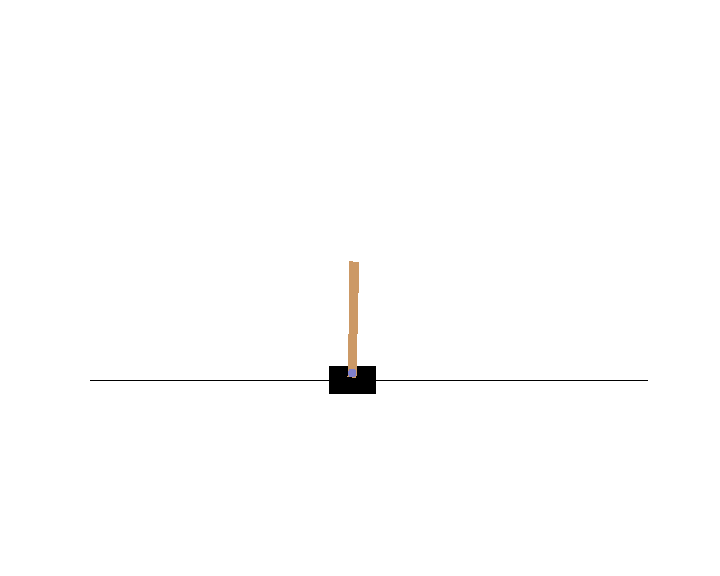
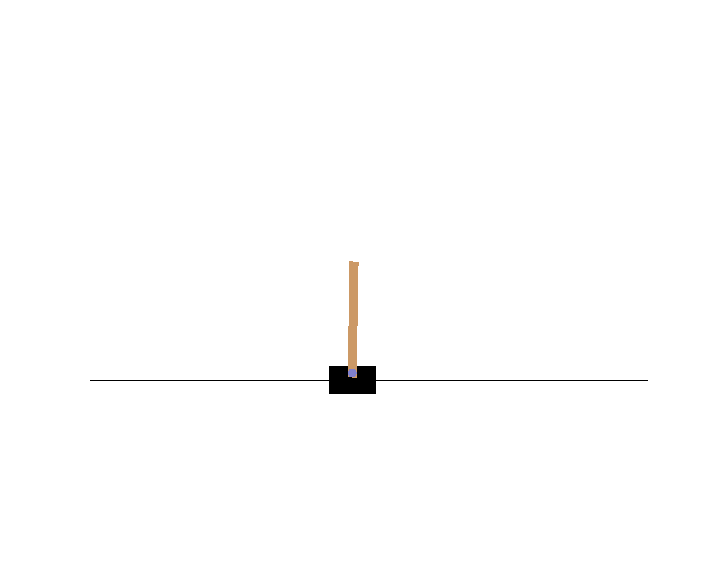
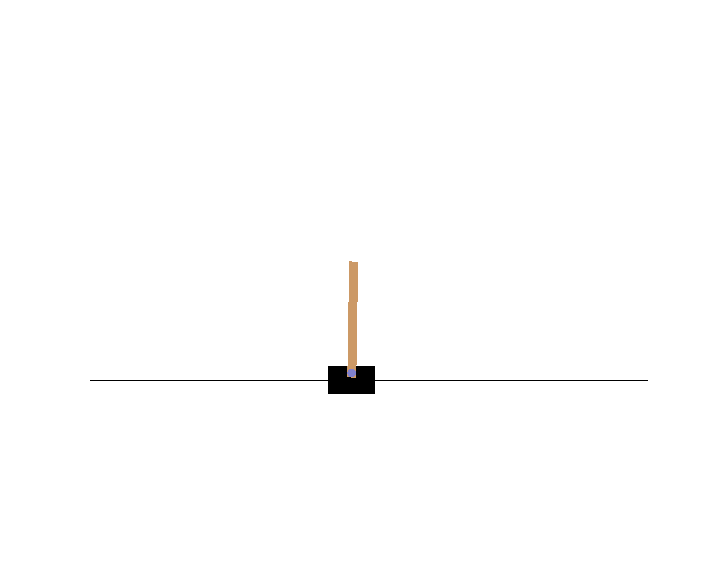
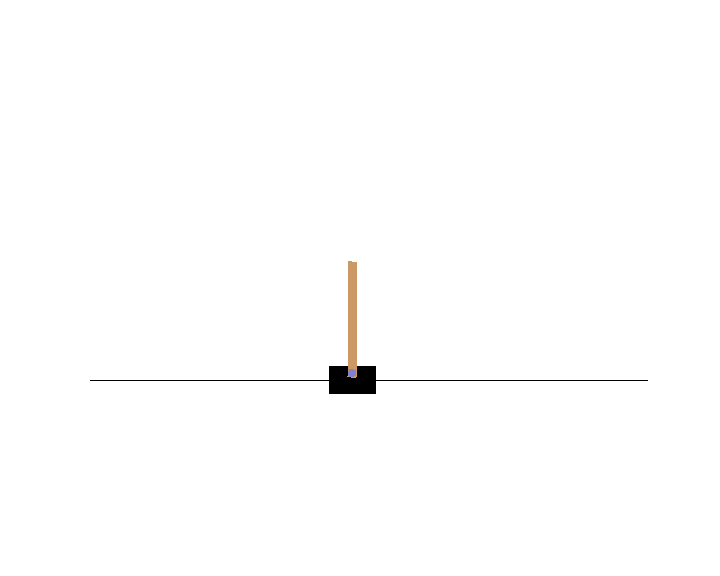
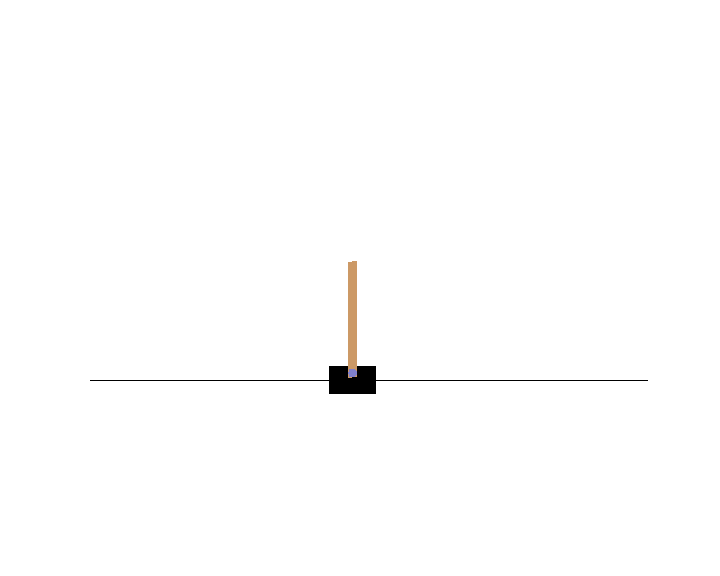
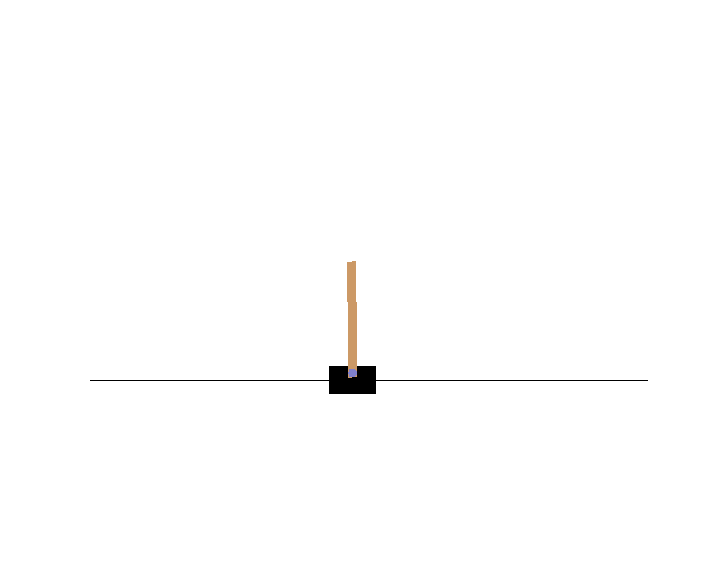
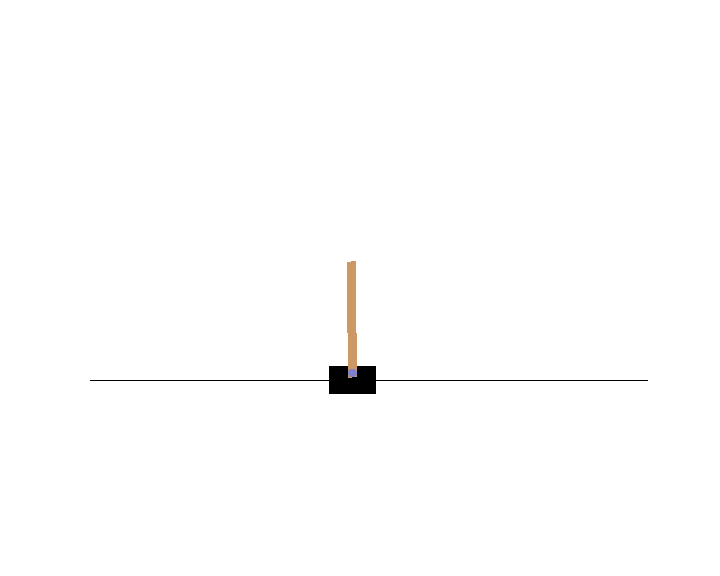
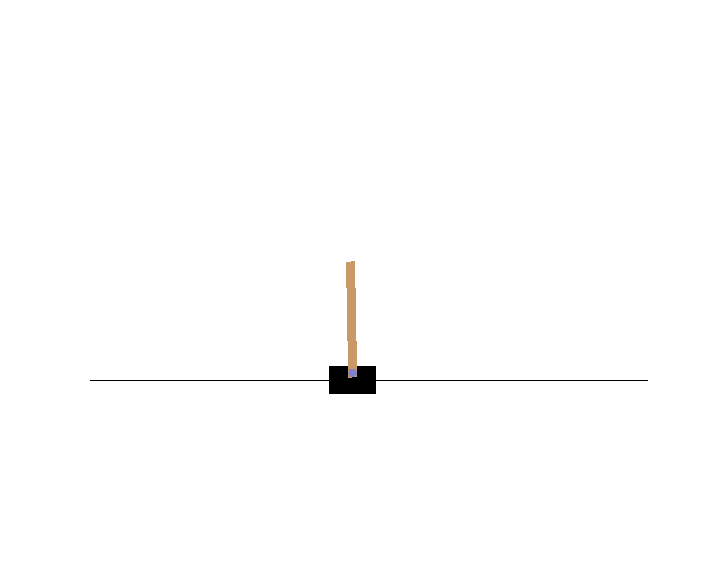
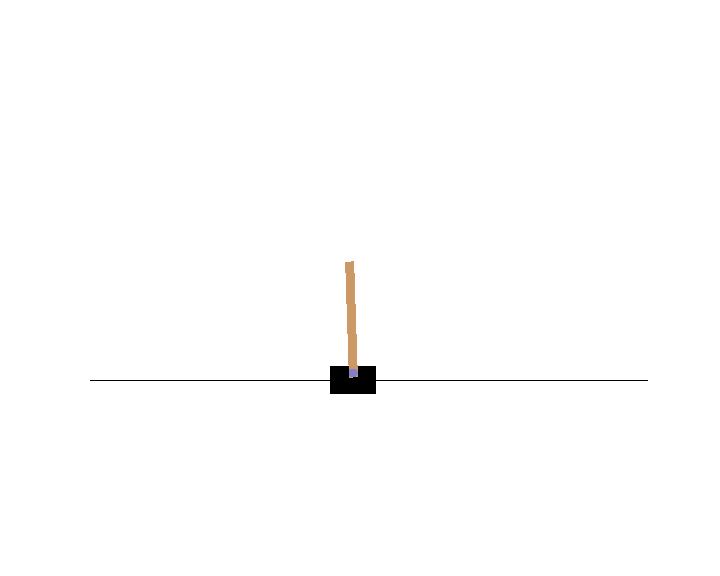
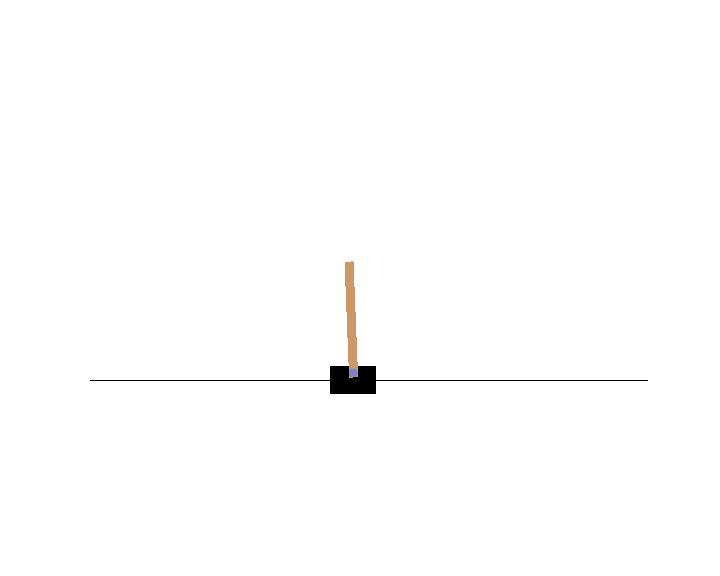
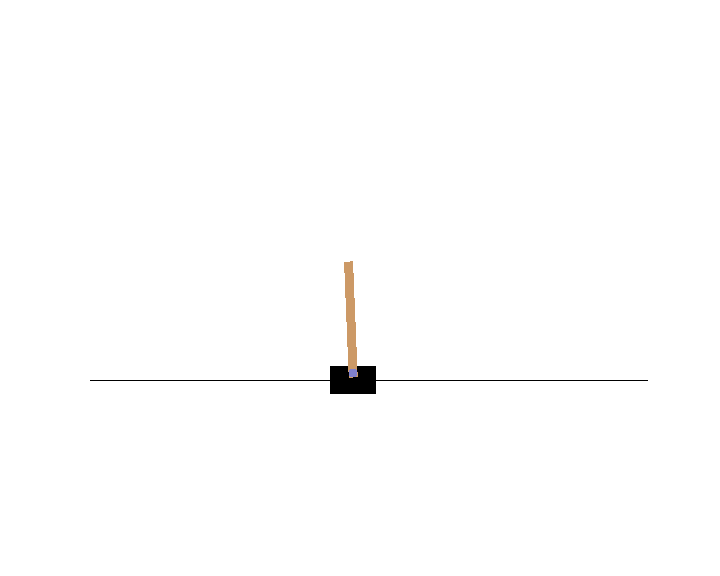
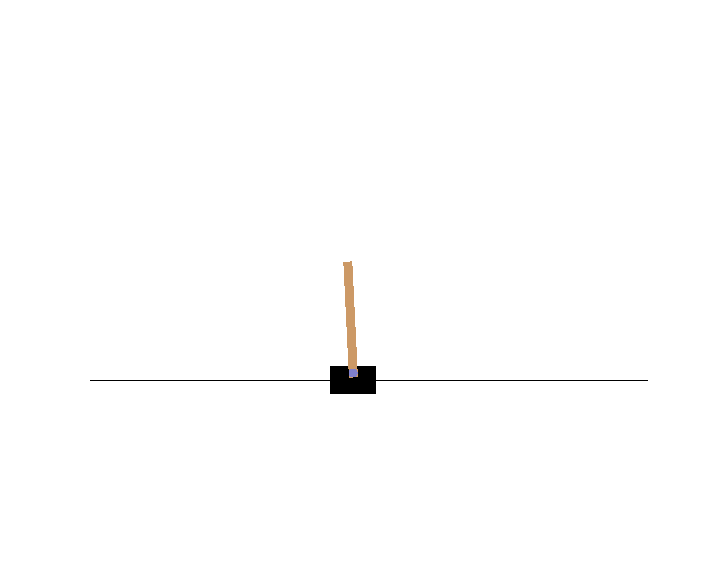
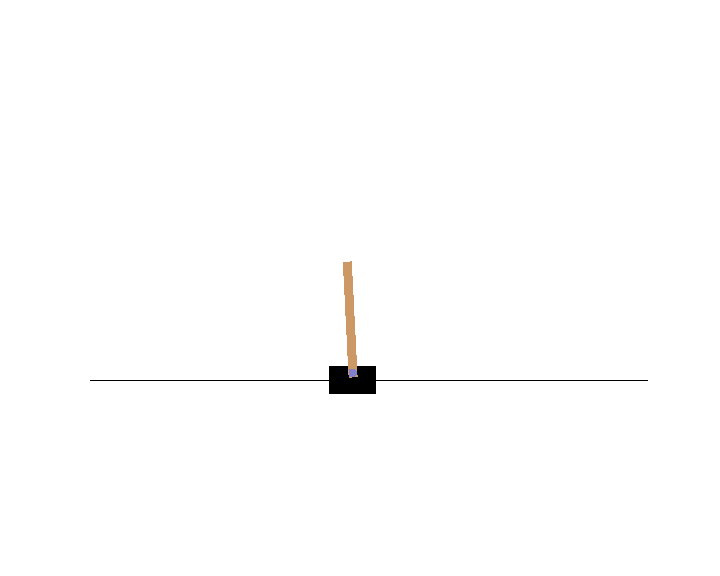
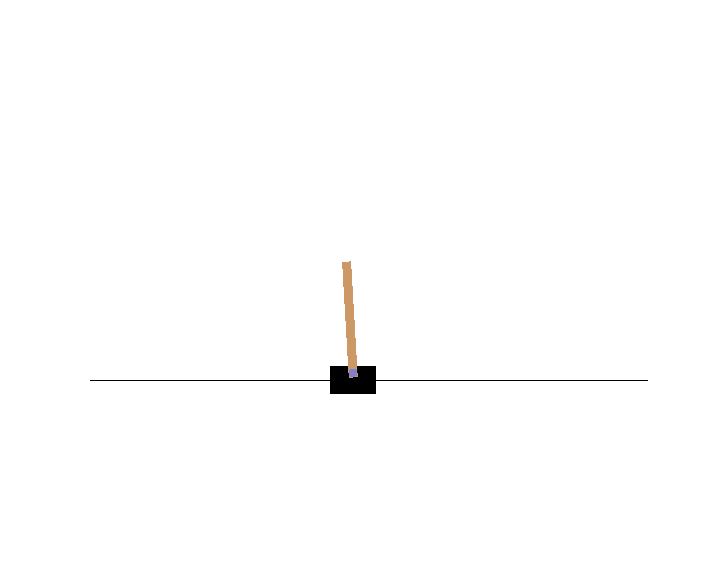
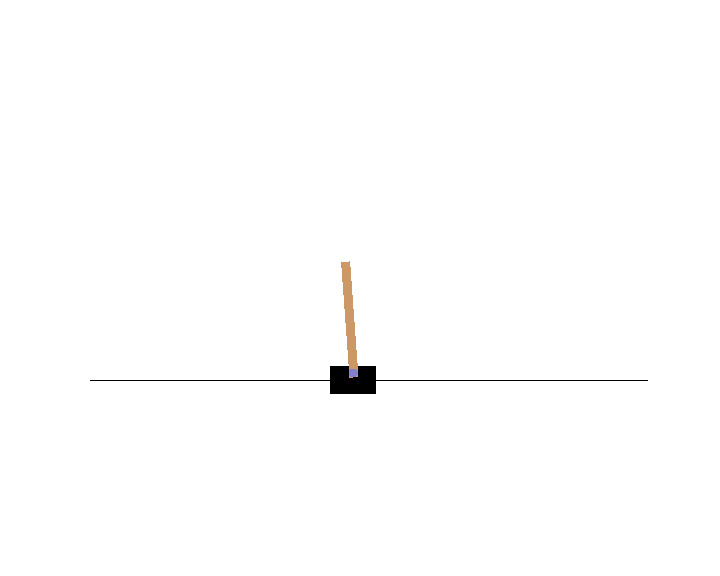
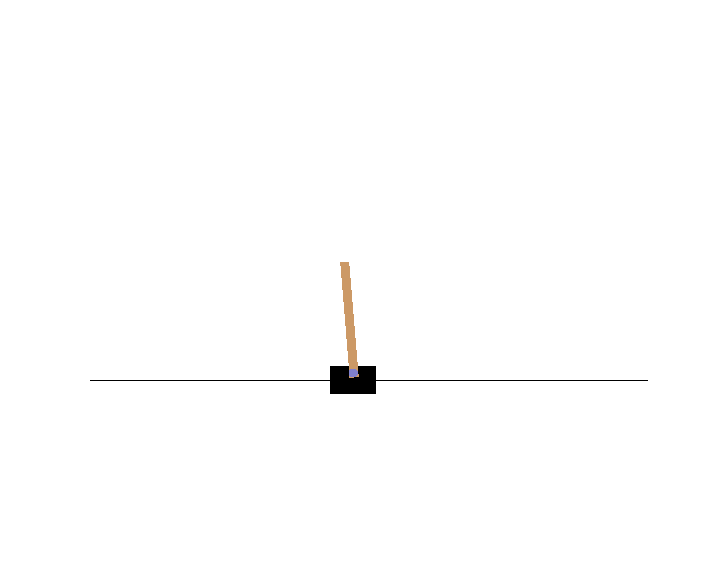
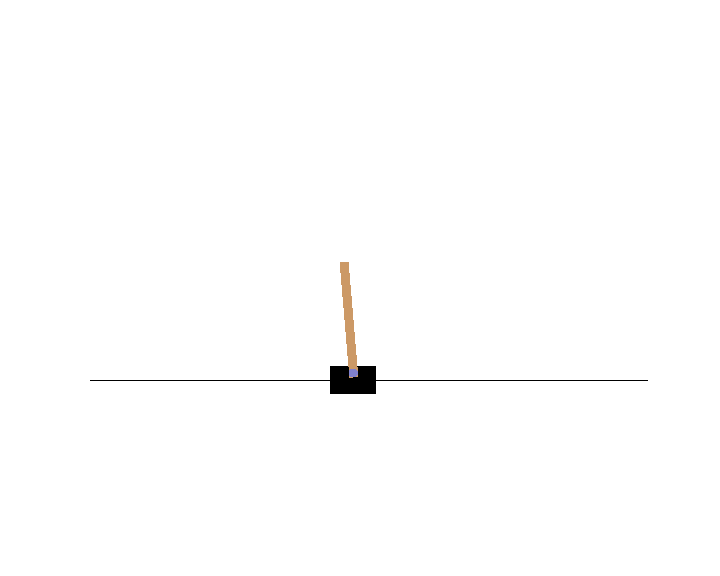
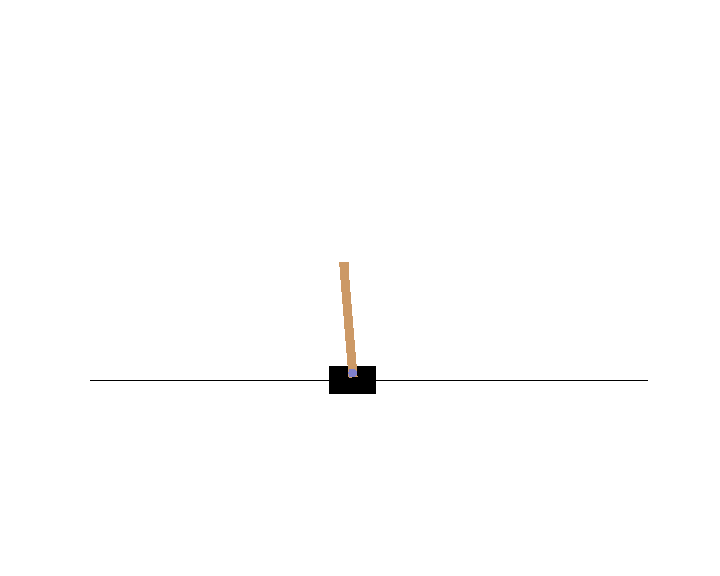
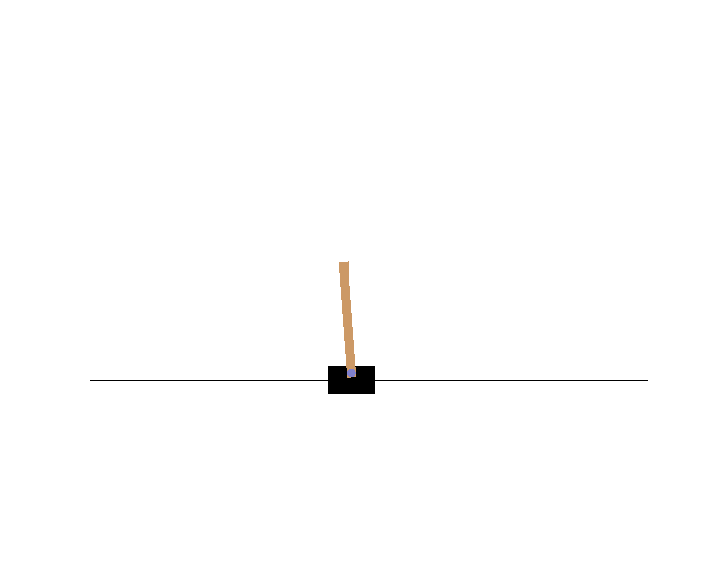
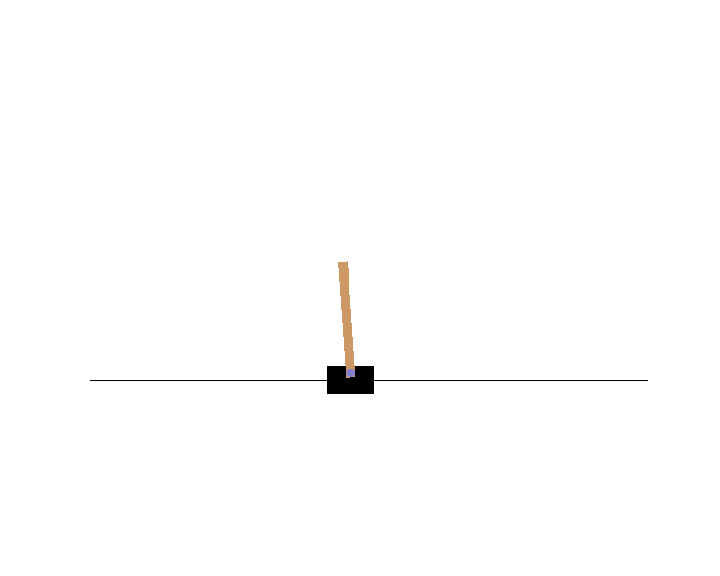
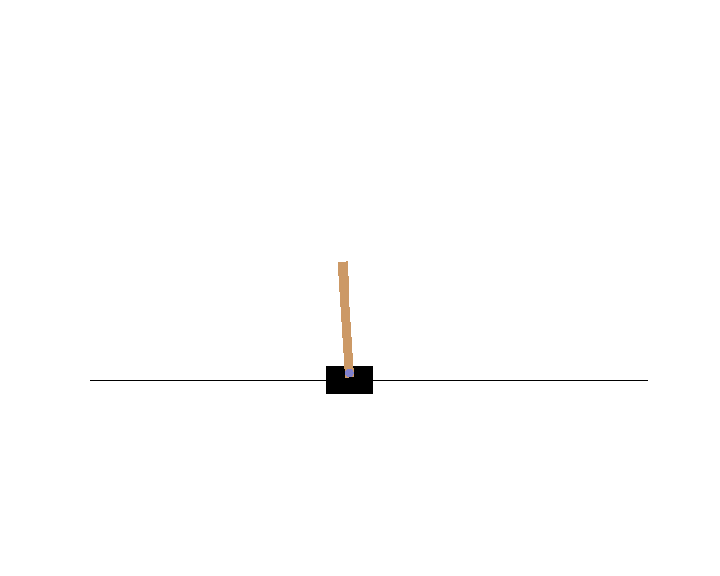
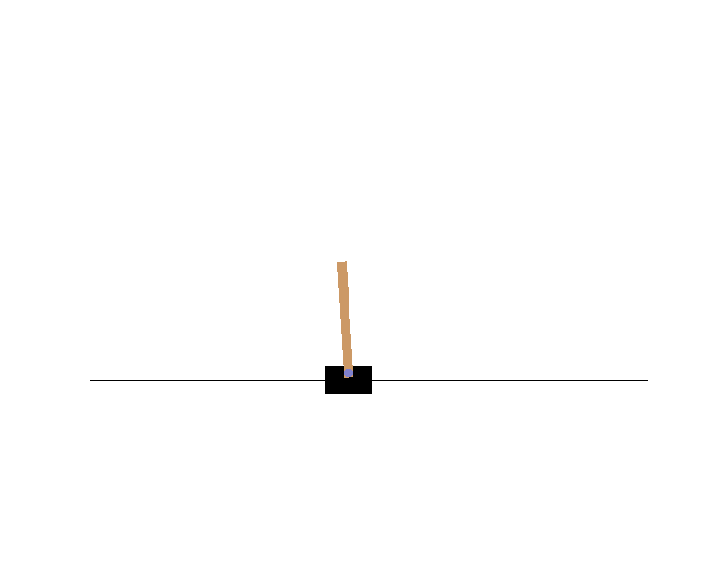
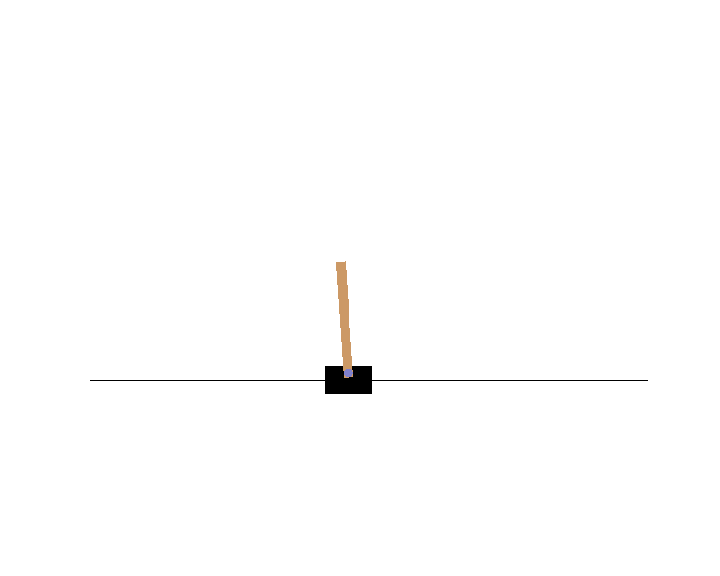
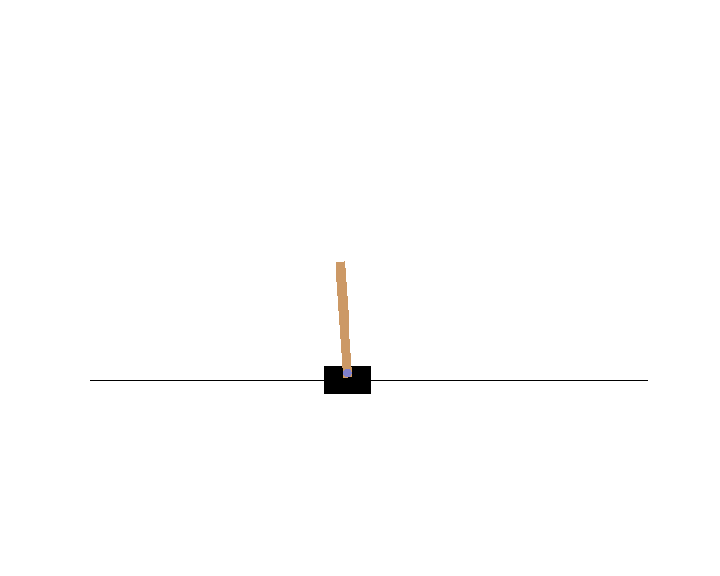
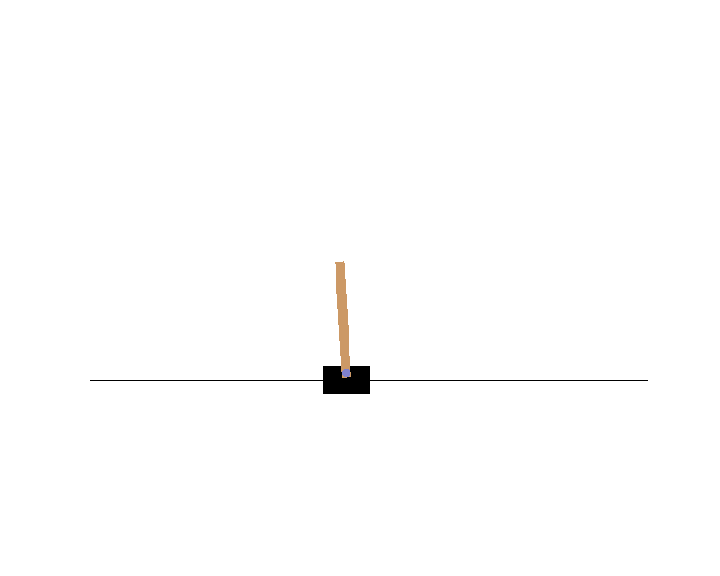
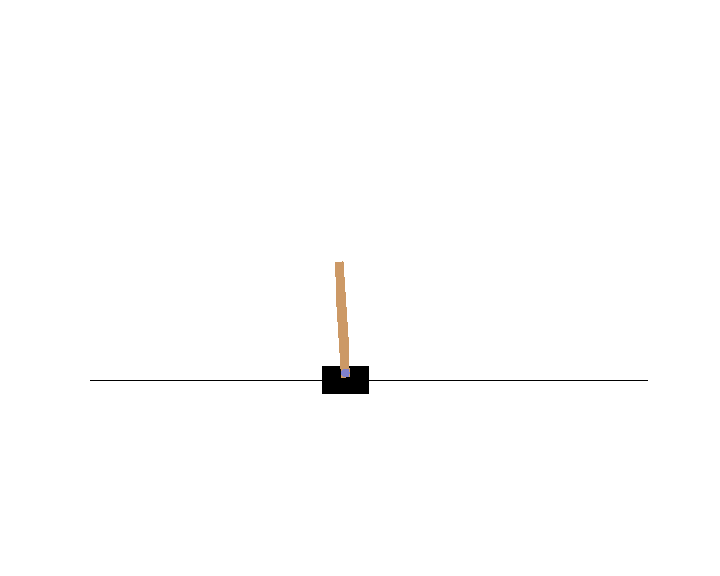
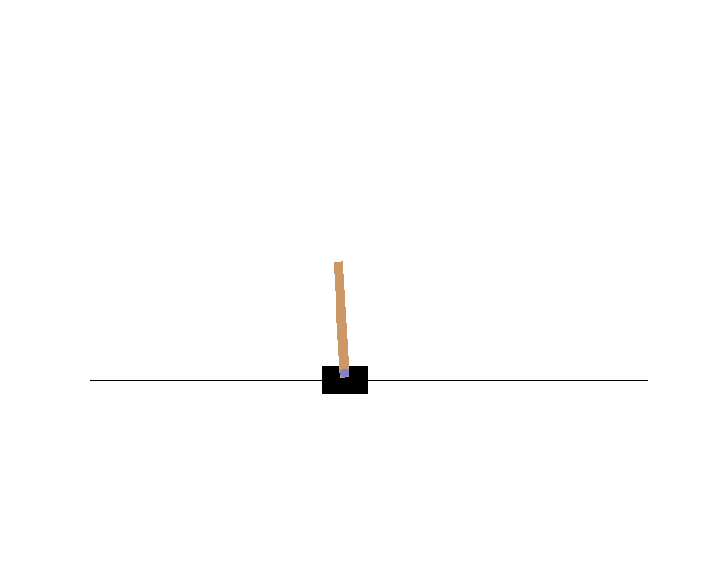
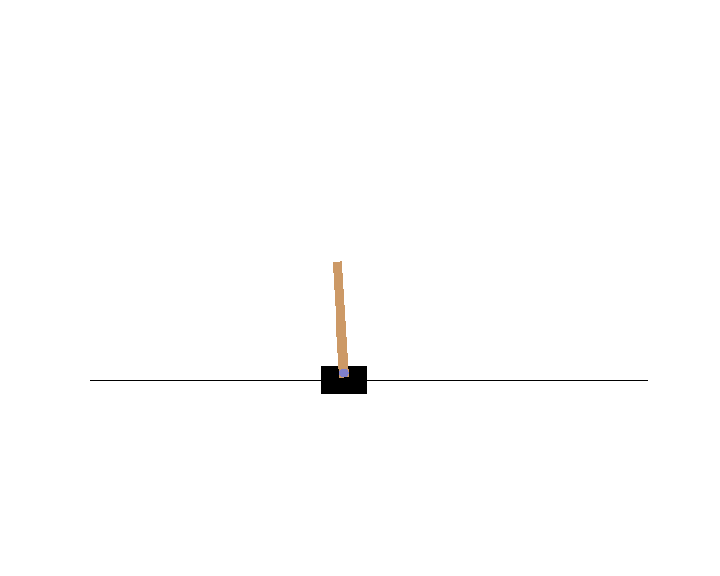
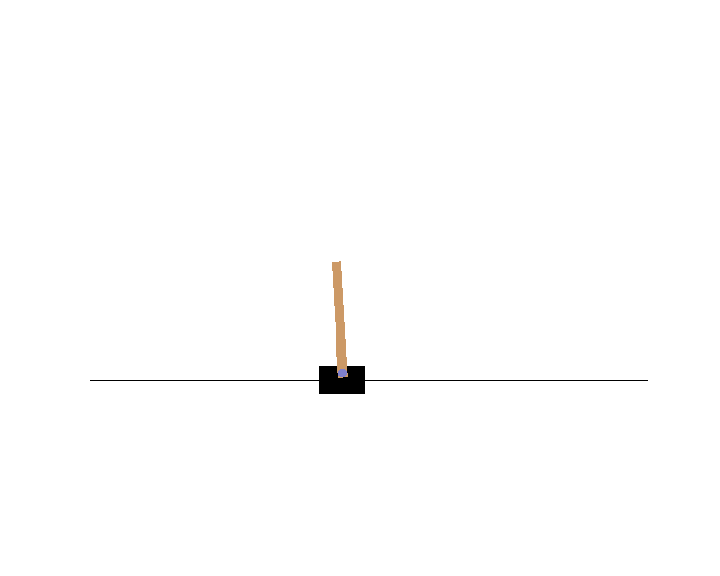
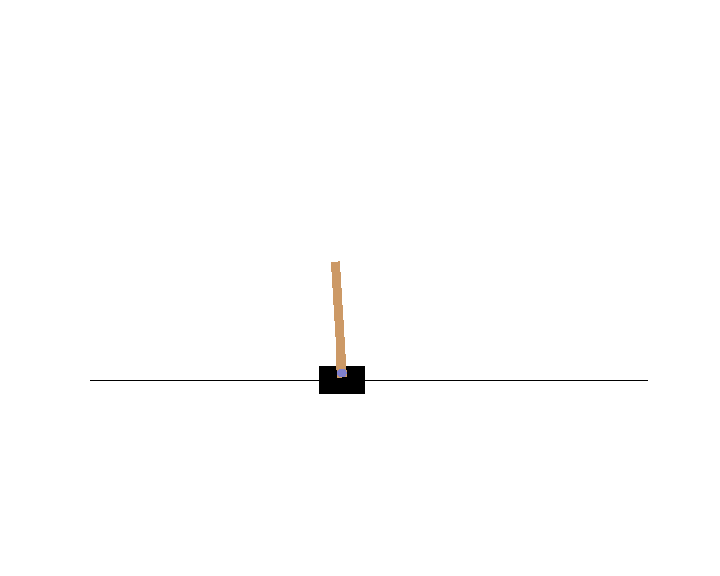
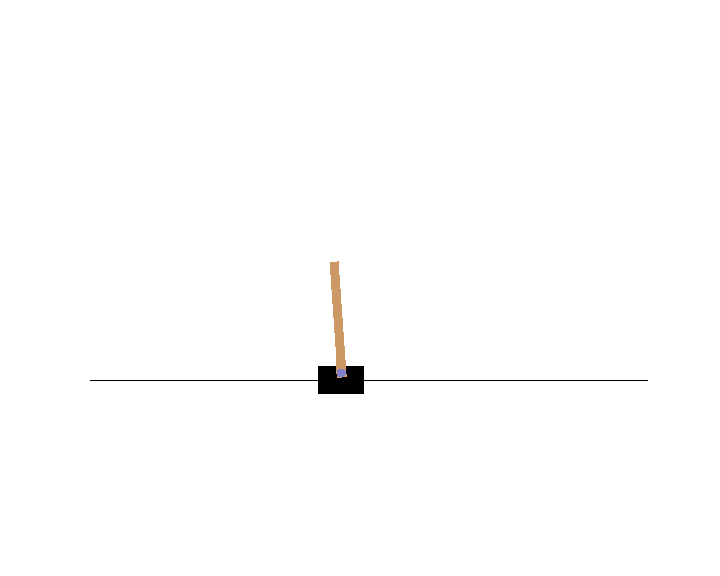
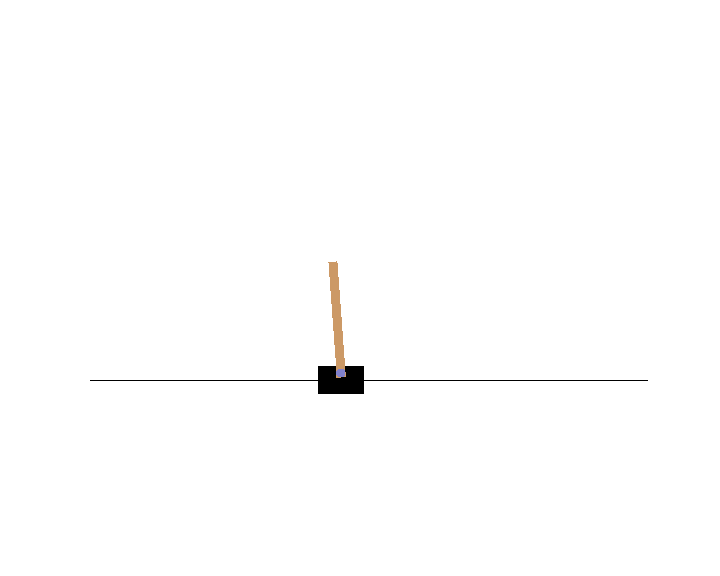
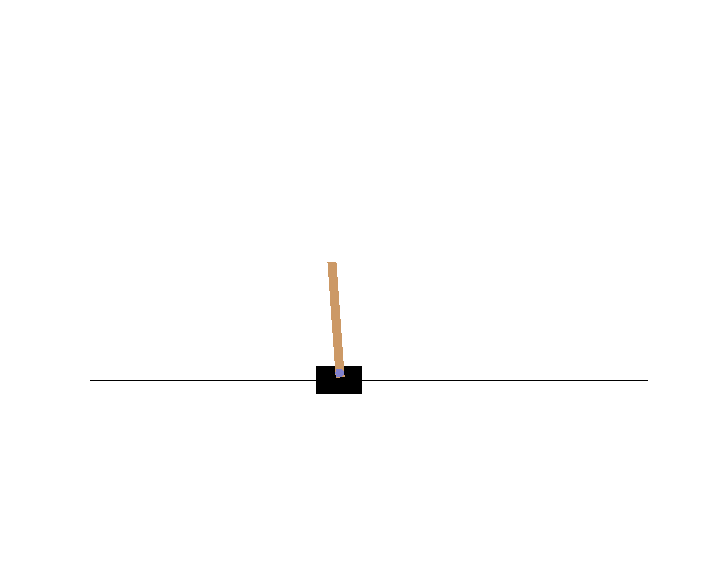
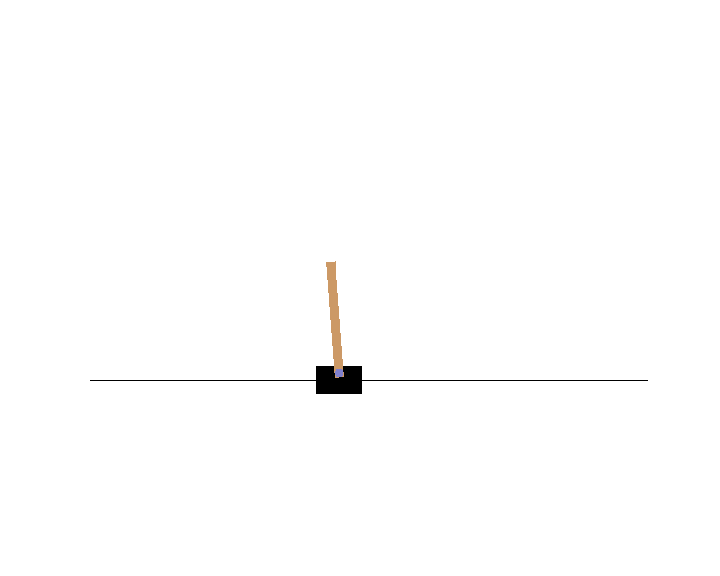
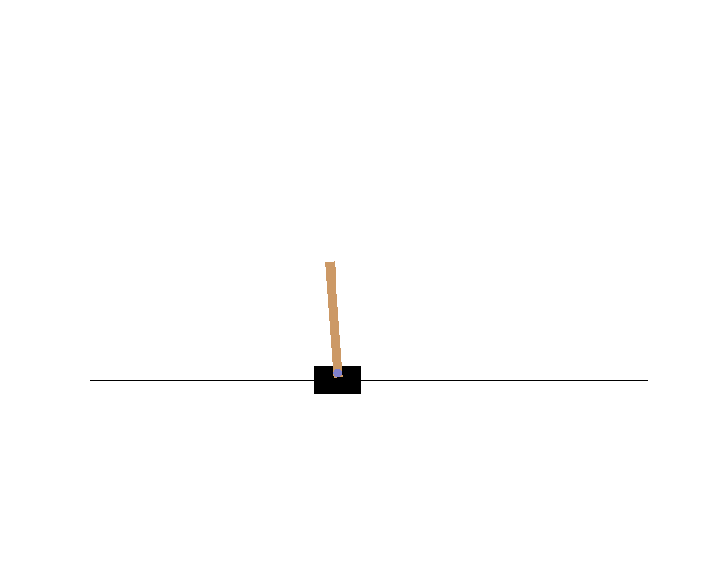
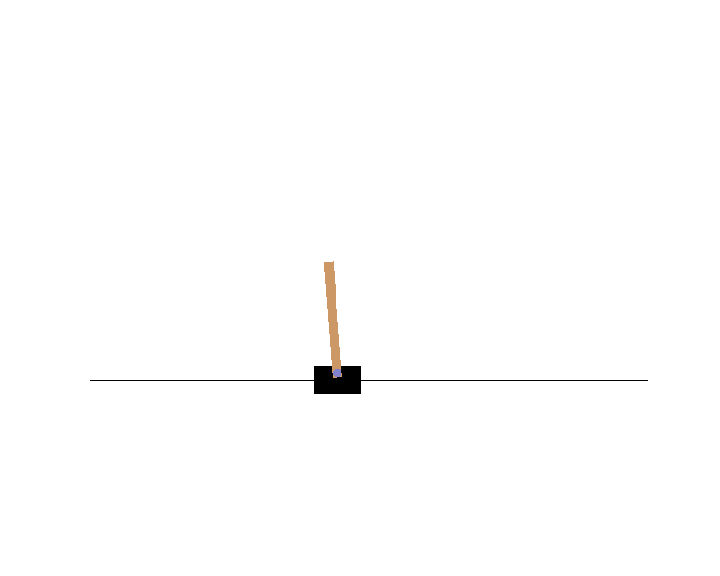
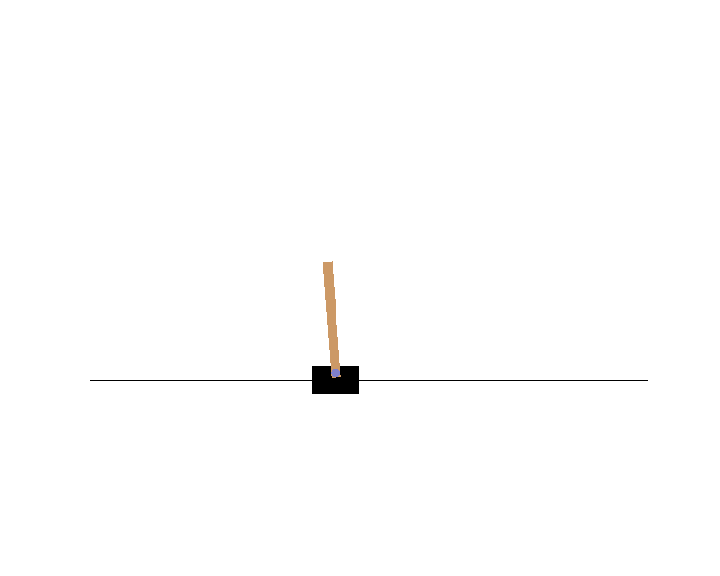
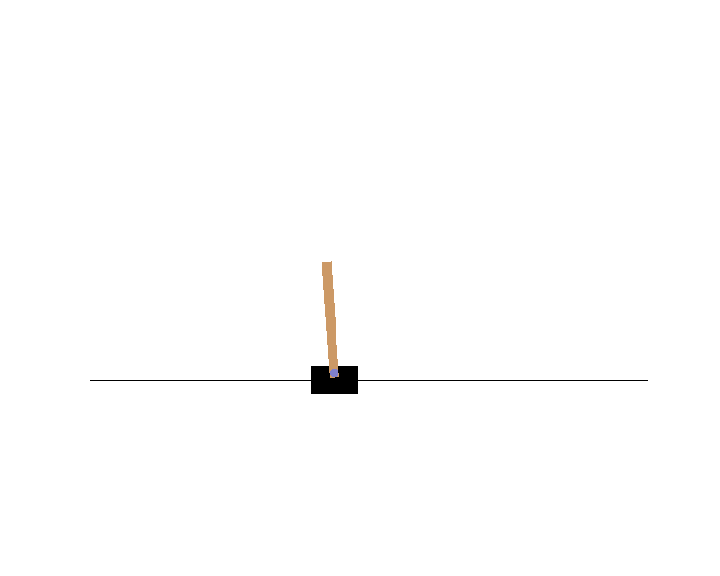
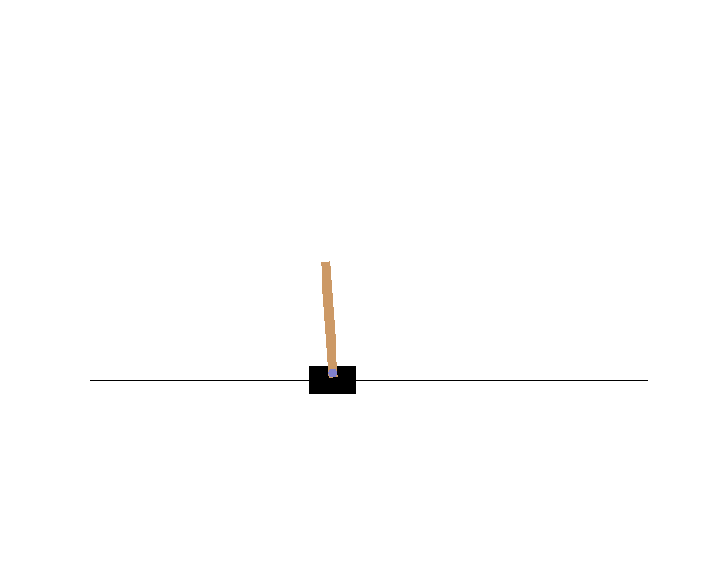

In [46]:
display_frames_as_gif(frames)

['data/test_CartPole-v0_28-05-2018_02-11-45']


/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


KeyError: 'Iteration'

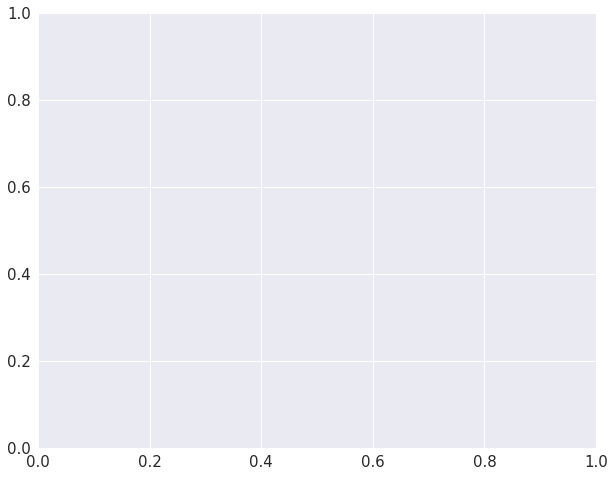

In [48]:
data = []
logdirs = [logdir]
values = 'AverageReturn'

for logdir in logdirs:
    data += plot.get_datasets(logdir)

if isinstance(values, list):
    values = values
else:
    values = [values]
    
for value in values:
    plot.plot_data(data, os.path.join('data', 'nn_baseline_test' + value + '.png'), value=value)
    
print('finished plotting :3')